# Project Data Analysis

This notebook contains the analysis of project data for the Reddit place experiment.

We have computed several distributions, scatter plots and visualizations to better understant the dataset.

To run this notebook, the following files should be precomputed in the '.../data/' folder:

1) sorted_tile_placements_proj.csv : Tile updates with project information added. Format: 

#ts,user,x_coordinate,y_coordinate,color,pic_id,pixel,pixel_color

2) sorted_tile_placements_proj_den_freq.csv : Denoised version of the previous file using Frequent Pixel heuristic.

3) sorted_tile_placements_proj_den_freq.csv : Denoised version of same file based on figure created by users.

4) atlas.json : Filtered version of the place atlas

# Sections:

## Single Variable
[Updates per User](#Updates_per_User)

[Updates per Project](#Updates_per_Project)

[Updates Entropy per Project](#Updates_Entropy_per_Project)

[Updates Entropy (Time) per project](#Updates_Time_Entropy_per_Project)

[Colors and Entropy (Color) per Project (Original Data)](#Colors_and_Entropy_(Color)_per_Project_Original)

[Colors and Entropy (Color) per Project (Denoised Data using Frequent Color)](#Colors_and_Entropy_(Color)_per_Project_Denoised_Frequent)

[Colors and Entropy (Color) per Project (Denoised by Users)](#Colors_and_Entropy_(Color)_per_Project_Denoised_Users)

[Pixels per Project](#Pixels_per_Project)

[Projects per User](#Projects_per_User)

[Users per Project](#Users_per_Project)

[Time per Project](#Time_per_Project)

[Area per Project](#Area_per_Project)

## Two Variables

### Update
[Update vs Entropy](#Update_vs_Entropy)

[Update vs Pixel](#Update_vs_Pixel)

[Update vs User](#Update_vs_User)

[Update vs Time](#Update_vs_Time)

[Update vs Area](#Update_vs_Area)

### Pixels

[Pixels vs Entropy](#Pixels_vs_Entropy)

[Pixels vs Users](#Pixels_vs_Users)

[Pixels vs Time](#Pixels_vs_Time)

[Pixels vs Area](#Pixels_vs_Area)

### Users

[Users vs Entropy](#Users_vs_Entropy)

[Users vs Time](#Users_vs_Time)

[Users vs Area](#Users_vs_Area)

### Time

[Time vs Entropy](#Time_vs_Entropy)

[Time vs Area](#Time_vs_Area)

### Area

[Area vs Entropy](#Area_vs_Entropy)

# Others

[Updates per Time](#Updates_per_time)

[User Community](#User_community)


In [1]:
import csv
import sys
import os
import math
import random
import numpy as np
import numpy.linalg as npla
import scipy
import sklearn
from scipy import sparse
from scipy import linalg
import scipy.sparse.linalg as spla
from scipy.spatial import distance
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d
import operator
import statistics
import networkx as nx
import matplotlib.pyplot as plt


In [2]:
import sys
sys.path.append("../Python_code") # go to parent dir
from reddit import *
from canvas_vis import *
from project_data_analysis import *
from generate_proj_to_remove import *

# Setting up Variables

In [3]:
#Run this before anything else!

input_file_proj = "../data/sorted_tile_placements_proj.csv"
input_file_proj_den_freq = "../data/sorted_tile_placements_proj_den_freq.csv"
input_file_proj_den_users = "../data/sorted_tile_placements_proj_den_users.csv"

# input_file_proj_den_freq = "../data/tile_placements_denoised_freq_proj.csv"
# input_file_proj_den_users = "../data/tile_placements_denoised_users_proj.csv"
# js_filename = "../data/atlas.json"
js_filename = "../data/atlas_complete.json"

#Projects to remove 777, 1921 (whole canvas), 1240, 1516 (1 pixel), 1319 (very incomplete)
#1169, 42 (repeated American Flag, 1122), 1066 (repeated blue corner 67), 
#1757 (repeated the far left side 736), 1824 (climber's head, too small)
#320 (repeated kenkistan/rainbow flat 3311)
#351 (repeated erase the place 1297)
#1046, 1073 (repeated channel orange 958)
#998, 1870 (repeated darth plagueis the wise 75)
#1383, 1493, 1823, 1818, 645, 1640 (Very small)
#1811, 1925, 1927, 704, 1085, 1308, 1378, 1412, 1418, 1428, 1455, 1482, 1512, 1548, 1589, 
#1614, 1790, 939, 1263, 1383, 1155, 1524, 129, 1595, 1254, 1528, 1529, 1578, 1616, 1721 (Covered)
# projects_to_remove = {'777', '1921', '1169', '42', '1066', '1757', '1824', '320', '998', '1870', '1811',\
#                      '1925', '1927', '704', '1085', '1308', '1378', '1412', '1418', '1428', '1455', '1482',\
#                       '1512', '1548', '1589', '1614', '1790', '1319', '939', '1263', '1383', '1155', '1761', 
#                      '1524', '351', '129', '1046', '1073', '1595', '1254', '1528', '1529', '1578', '1616',\
#                      '1721'}

#projects_to_remove = get_list_of_removed_proj(output_filename = "../data/proj_to_remove.txt")
# projects_to_remove_ints = {1416,1900,2012,637,2010,1014,1455,1482,61,1913,1820,1493,360,235,645,1797,1990,2016,1418,399,2021,1206,1935,1378,704,1890,1707,1616,1412,23,1715,1658,2004,2025,1512,1790,1811,1383,1649,1348,286,285,1936,1891,1640,49,1763,56,1210,1557,2023,1720,48,1228,1758,1692,1139,1994,1598,1641,581,789,1240,357,1809,2007,1818,1904,1979,2018,347,1908,1122,361,1624,1695,21,123,1308,1824,1970,1548,2,181,46,1319,1981,1976,1039,1659,1940,1516,1823,75,1289,81,1085,1925,236,1849}
# projects_to_remove = set()
# for item in projects_to_remove_ints:
#     projects_to_remove.add(str(item))

locations = store_locations(js_filename)

names, descriptions = read_picture_names_and_descriptions_17(js_filename)

In [ ]:
tile_placement = "../data/tile_placements_no_duplicates.csv"

<a id='Updates_per_User'></a>
# Updates per User

In [30]:
# Compute the updates per user
updates_user, total_updates = updates_per_user(tile_placement)
print("total updates:", total_updates)

total updates: 16559407


In [31]:
sorted_up_user = sorted(updates_user.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_up_user[:10])
#Top-10
for i in range(10):
    proj = sorted_up_user[i]
    up = sorted_up_user[i]

    print("User #" + str(i + 1), ", Num Updates: ", up)

[('OBGjEkRD09yu5Uw0FgQQnFNjeyY=', 656), ('6whGUpepOlmAj6ydDamdCELRHuY=', 598), ('V40ggJsRo4i8b9gGCrQLkSwZR7s=', 587), ('pCeLxmy4nHK/MrmvB79SJbY28Z0=', 586), ('CXqR8m6juza7sv0ToZKdQGn1AKs=', 583), ('A+sy0dskwq9oI+crAiB8Bxsdy38=', 581), ('HKcdl//bPhehffDpkNMjGgisjmQ=', 581), ('wD36KJZtWEalc2mO/+uqXnb4bRs=', 572), ('1/3edvQvuZXcp28qmA19+vQoSPk=', 568), ('Ust9jl6j6wV+kPVWJioaIua+K+o=', 564)]
User #1 , Num Updates:  ('OBGjEkRD09yu5Uw0FgQQnFNjeyY=', 656)
User #2 , Num Updates:  ('6whGUpepOlmAj6ydDamdCELRHuY=', 598)
User #3 , Num Updates:  ('V40ggJsRo4i8b9gGCrQLkSwZR7s=', 587)
User #4 , Num Updates:  ('pCeLxmy4nHK/MrmvB79SJbY28Z0=', 586)
User #5 , Num Updates:  ('CXqR8m6juza7sv0ToZKdQGn1AKs=', 583)
User #6 , Num Updates:  ('A+sy0dskwq9oI+crAiB8Bxsdy38=', 581)
User #7 , Num Updates:  ('HKcdl//bPhehffDpkNMjGgisjmQ=', 581)
User #8 , Num Updates:  ('wD36KJZtWEalc2mO/+uqXnb4bRs=', 572)
User #9 , Num Updates:  ('1/3edvQvuZXcp28qmA19+vQoSPk=', 568)
User #10 , Num Updates:  ('Ust9jl6j6wV+kPVWJioaIua+

In [32]:
# AVG
print("AVG = ", np.mean(np.array(list(updates_user.values()))))

#STD
print("STD = ", np.std(np.array(list(updates_user.values()))))

AVG =  14.190647377207085
STD =  29.929818449494757


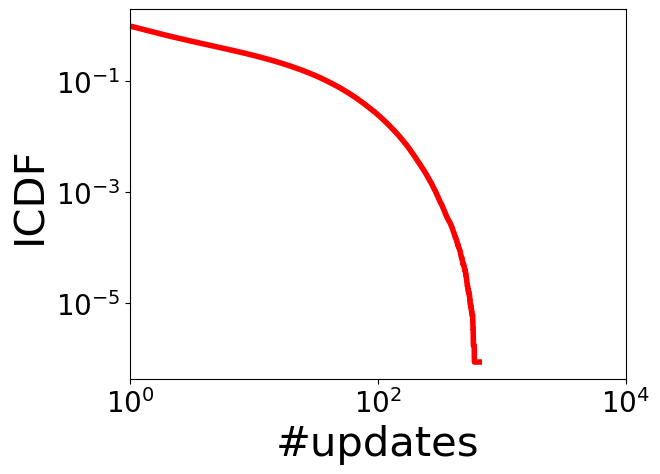

In [33]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,10000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(updates_user)
    
plot_updates_per_user_icdf(count, "../plots/plot_updates_per_user_icdf.svg")

## Original results for updates per user

In [5]:
sorted_up_user = sorted(updates_per_user.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_up_user[:10])
#Top-10
for i in range(10):
    proj = sorted_up_user[i]
    up = sorted_up_user[i]

    print("User #" + str(i + 1), ", Num Updates: ", up)

[('f50zuiZ/KSfW328sUtaRSMJD5vo=', 1500), ('bhQOgHEtNudXHCfmPW6ikeamSEU=', 1459), ('s2c0aTiHdM7I4G6lxDGXaWVOIFY=', 1443), ('QWBIPXDjamxzWDYnQqlYEYt4W4c=', 1392), ('MN9OvJPRdPzP+EIj2sr3C+Ryt0s=', 1385), ('raQFDXuIAK3kUdLTU7JgOMk7C9s=', 1303), ('OuXtN8gcP8U3zZT8/Zwh36CwvjA=', 1275), ('WcL6AmG604VUFpRcoobYRusNzbk=', 1257), ('u9p0GxBJe2YOt0o9wLM4NKyfljw=', 1252), ('5RxaSBeArG5gZf2NNf3e/3fui7Q=', 1241)]
User #1 , Num Updates:  ('f50zuiZ/KSfW328sUtaRSMJD5vo=', 1500)
User #2 , Num Updates:  ('bhQOgHEtNudXHCfmPW6ikeamSEU=', 1459)
User #3 , Num Updates:  ('s2c0aTiHdM7I4G6lxDGXaWVOIFY=', 1443)
User #4 , Num Updates:  ('QWBIPXDjamxzWDYnQqlYEYt4W4c=', 1392)
User #5 , Num Updates:  ('MN9OvJPRdPzP+EIj2sr3C+Ryt0s=', 1385)
User #6 , Num Updates:  ('raQFDXuIAK3kUdLTU7JgOMk7C9s=', 1303)
User #7 , Num Updates:  ('OuXtN8gcP8U3zZT8/Zwh36CwvjA=', 1275)
User #8 , Num Updates:  ('WcL6AmG604VUFpRcoobYRusNzbk=', 1257)
User #9 , Num Updates:  ('u9p0GxBJe2YOt0o9wLM4NKyfljw=', 1252)
User #10 , Num Updates:  ('5RxaS

In [6]:
#Top-10
for i in range(1, 11):
    proj = sorted_up_user[-i]
    up = sorted_up_user[-i]
    print("User #" + str(i + 1), ", Num Updates: ", up)

User #2 , Num Updates:  ('C02kpVSohDxkvU6+zEOk8XkLi+0=', 1)
User #3 , Num Updates:  ('FFM2JLPM+c7EpK+xSwcMCyefTpo=', 1)
User #4 , Num Updates:  ('/mBh7uU8QIdYWwrlJUp+XyGa7p0=', 1)
User #5 , Num Updates:  ('Ln9kGeSN2q2HB80ktOZHM1eahmw=', 1)
User #6 , Num Updates:  ('u/Qi8A5V3v1782/p4UGe9/GnjR4=', 1)
User #7 , Num Updates:  ('SjiIiKWQknWdneodGhvE741E+GE=', 1)
User #8 , Num Updates:  ('zCQNYYeKQVmxD/GUu8kH8uNdagI=', 1)
User #9 , Num Updates:  ('2nc1Y33sZOBkkD1i9Lj53IXY5g8=', 1)
User #10 , Num Updates:  ('gU7fqU0YbCAxjCLvBuE4mlHxryM=', 1)
User #11 , Num Updates:  ('1uBmAArsvykSPQsNebL8FSPW2QY=', 1)


In [7]:
# AVG
print("AVG = ", np.mean(np.array(list(updates_per_user.values()))))

AVG =  20.95840627176796


In [8]:
#STD

print("STD = ", np.std(np.array(list(updates_per_user.values()))))

STD =  46.62089135829027


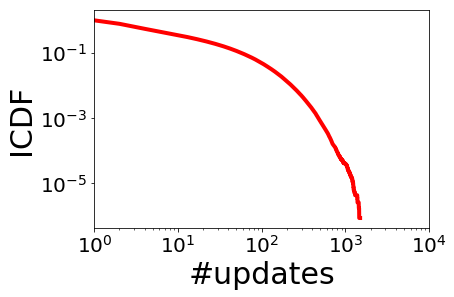

In [13]:
#Inverse cumulative density funcition

def plot_updates_per_user_icdf(count, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=20)
    ax.set_xlim(1,10000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(updates_per_user)
    
plot_updates_per_user_icdf(count, "../plots/plot_updates_per_user_icdf.svg")

<a id='Updates_per_Project'></a>
# Updates per Project

In [181]:
#Computing updates per project
updates_per_proj, total_updates = updates_per_project(input_file_proj, projects_to_remove)

#computing the updates in three different category: agree,disagree,final
tile_updates, total_tile_updates = update_category_per_project()

print("total updates:", total_updates)

total updates: 15551173


In [15]:
sorted_up_proj = sorted(updates_per_proj.items(), key=operator.itemgetter(1), reverse=True)
print(sorted_up_proj[:10])
#Top-10
for i in range(10):
    proj = sorted_up_proj[i][0]
    up = sorted_up_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", updates: ", up, ", \ndesc: ", desc, "\n")

[('95', 544512), ('1066', 359971), ('1757', 325616), ('73', 239336), ('147', 227597), ('1628', 209396), ('19', 197522), ('1946', 193857), ('1915', 190952), ('390', 169074)]
# 0 , project:  osu! Logo , updates:  544512 , 
desc:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 1 , project:  The Blue Empire , updates:  359971 , 
desc:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. The blue corner was pushed back gradually as more organised projects superseded the early pattern-based structures. The current blue corner is a mere reminde

In [16]:
#Bottom-10

for i in range(1,11):
    proj = sorted_up_proj[-i][0]
    up = sorted_up_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", updates: ", up, ", \ndescription: ", desc, "\n")

# 1 , project:  The Red Dot , updates:  17 , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Smiley Face , updates:  84 , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  Tiny danish flag , updates:  112 , 
description:  denmark is a samll nation in the nothern part of europe 

# 4 , project:  The R , updates:  121 , 
description:  The R of the sub r/The_R 

# 5 , project:  St.Georges Flag , updates:  125 , 
description:  Created by /u/tinysocksb. The piece took several hours to create and was destroyed for reasons unknown, replaced by black blocks the space appears unused. Picture can be seen below on imgur. 

# 6 , project:  Red P , updates:  126 , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot an

In [17]:
#AVG

print("AVG = ", np.mean(np.array(list(updates_per_proj.values()))))

AVG =  11470.934281842818


In [18]:
#STD

print("STD = ", np.std(np.array(list(updates_per_proj.values()))))

STD =  28857.894512352428


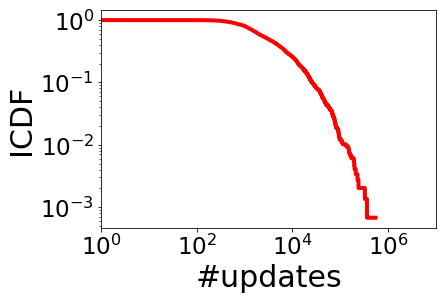

In [19]:
#Inverse cumulative density funcition

def plot_updates_per_project_icdf(count, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    ax.loglog(range(len(count)), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#updates', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1,10000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(updates_per_proj)
    
plot_updates_per_project_icdf(count, "../plots/plot_updates_per_project_icdf.svg")

<a id='Updates_Entropy_per_Project'></a>
# Updates Entropy per Project

In [20]:
#Computing update-entropy per project: agreeing vs disagreeing
#tile_updates is computed in the previous block
update_entropy_per_proj=update_entropy_per_project(tile_updates)

In [21]:
sorted_up_ent_proj = sorted(update_entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_up_ent_proj[i][0]
    up_ent = sorted_up_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Flag of Serbia , update_entropy:  0.6931470698749712 , 
desc:   

# 1 , project:  Lúcio , update_entropy:  0.6931470265813146 , 
desc:  Lúcio is a character from Overwatch (r/overwatch multiplayer first person shooter by blizzard), and, later, Heroes Of the Storm (r/heroesofthestorm, MOBA game, again, by Blizzard).<br>He's a DJ from Rio, Brazil, who uses futuristic sound-based technology to fight enemies. 

# 2 , project:  The Rise of MMA , update_entropy:  0.6931467866994165 , 
desc:  This area was contested for some time. Initially occupied by a Canadian Flag. /r/Dwarffortress initially tried to take out the flag as they expanded. However as /r/indonesia began their assault on dwarf territory, /r/dwarffortress ceded the territory to /r/mma in return for an alliance against the Indonesians. MMA had to fight with Vaporwave and the AR logo above before finally taking control of this area. 

# 3 , project:  Canada Heart , update_entropy:  0.6931466734856675 , 
desc:  The 

In [22]:

#Bottom-10
for i in range(1,11):
    proj = sorted_up_ent_proj[-i][0]
    up_ent = sorted_up_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 1 , project:  (0,0) , update_entropy:  0.19495645830996725 , 
desc:  The top left corner of /r/place. Warred over by the purple corner, the runescape people, and various others 

# 2 , project:  Mars , update_entropy:  0.2158640137962607 , 
desc:  A depiction of the Red Planet. SpaceX's stated mission is to enable the human colonization of Mars within a few decades. 

# 3 , project:  The Red Dot , update_entropy:  0.22371807606583377 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 4 , project:  venus , update_entropy:  0.22711046403765367 , 
desc:   

# 5 , project:  Sydney FC , update_entropy:  0.30201824565562313 , 
desc:  An A-League soccer club located in Sydney, Australia. 

# 6 , project:  Gold Codfish , update_entropy:  0.3176416297834633 , 
desc:  The /r/portugal equivalent of reddit gold. Given to topics and posts of high quality in the subreddit (mod flair) 

# 7 ,

In [23]:
#AVG

print("AVG = ", np.mean(np.array(list(update_entropy_per_proj.values()))))

AVG =  0.6400541871769824


In [24]:
#STD

print("STD = ", np.std(np.array(list(update_entropy_per_proj.values()))))

STD =  0.067020022471085


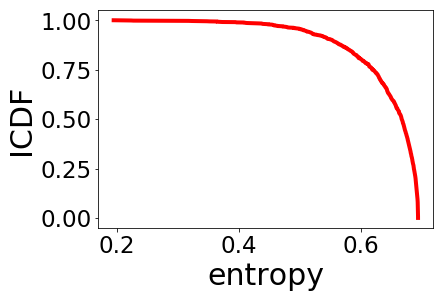

In [25]:
#Inverse cumulative density funcition
%matplotlib inline
def plot_update_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,math.log(.5)+.1, math.log(.1)))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(update_entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_update_entropies_per_project_icdf(entropy, count, "../plots/plot_update_entropies_users_icdf.svg")


<a id='Updates_Time_Entropy_per_Project'></a>
# Updates Entropy (Time) per Project

In [26]:
#Computing update-entropy per project: agreeing vs disagreeing over all the time slots (around 78 --- based on hours)
#tile_updates is computed in the previous block
update_time_entropy_per_proj=update_time_entropy_per_project(tile_updates)

In [27]:
sorted_up_time_ent_proj = sorted(update_time_entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_up_time_ent_proj[i][0]
    up_ent = sorted_up_time_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_time_entropy: ", up_ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Chrono Trigger , update_time_entropy:  4.88644940581749 , 
desc:  Characters from the SNES Game Chrono Trigger. From Left to Right: Magus, Robo (Overworld), Frog, Lucca, Marle, Ayla, Catalack, Crono, Poyozo Doll, Alfador (Janus's Cat) 

# 1 , project:  Rainbow Road , update_time_entropy:  4.885420340162544 , 
desc:  One of the first projects on r/place, and also one of the largest. It integrates itself with many other artworks. 

# 2 , project:  2007scape Memefest , update_time_entropy:  4.859837256416519 , 
desc:  Everything is this scare from Buying GF to the max cash pile are icons/memes from the game Oldschool Runescape 

# 3 , project:  The Blue Empire , update_time_entropy:  4.858880335515484 , 
desc:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. T

In [28]:
#Bottom-10
for i in range(1,11):
    proj = sorted_up_time_ent_proj[-i][0]
    up_ent = sorted_up_time_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", update_time_entropy: ", up_ent, ", \ndesc: ", proj, "\n")

# 1 , project:  The Red Dot , update_time_entropy:  1.2848787678241698 , 
desc:  1980 

# 2 , project:  Climber's Head (TowerClimb) , update_time_entropy:  2.2332703749380514 , 
desc:  1824 

# 3 , project:  ZUN (Touhou Project) , update_time_entropy:  2.76660808889955 , 
desc:  1784 

# 4 , project:  Flag of Madeira , update_time_entropy:  2.795325291037624 , 
desc:  1489 

# 5 , project:  Seventeen , update_time_entropy:  3.0173009882218986 , 
desc:  186 

# 6 , project:  Forsenboys , update_time_entropy:  3.019944871817405 , 
desc:  261 

# 7 , project:  Smiley Face , update_time_entropy:  3.064271096768814 , 
desc:  1419 

# 8 , project:  Karlstads International TIME Program , update_time_entropy:  3.068769843846288 , 
desc:  999 

# 9 , project:  Z , update_time_entropy:  3.079477496142267 , 
desc:  2009 

# 10 , project:  Intersex Heart , update_time_entropy:  3.096403870637453 , 
desc:  552 



In [29]:
#AVG

print("AVG = ", np.mean(np.array(list(update_time_entropy_per_proj.values()))))

AVG =  4.233429376707017


In [30]:
#STD

print("STD = ", np.std(np.array(list(update_time_entropy_per_proj.values()))))

STD =  0.3429412852058624


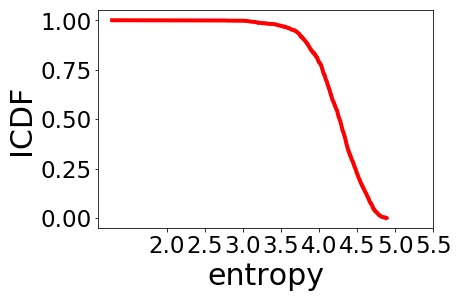

In [31]:
#Inverse cumulative density funcition
%matplotlib inline
def plot_update_time_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,math.exp(1)+.6, .69))
    ax.set_xticks(np.arange(2,6, .5))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(update_time_entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_update_time_entropies_per_project_icdf(entropy, count, "../plots/plot_update_time_entropies_users_icdf.svg")

<a id='Colors_and_Entropy_(Color)_per_Project_Original'></a>
# Colors and Entropy (Color) per Project (Original Data)

In [32]:
# Computing colors per project and entropies
#Only pixels (final) are considered.
colors_per_proj = colors_per_project(input_file_proj, projects_to_remove)
entropy_per_proj = entropy_per_project(colors_per_proj)

In [33]:
num_colors_per_proj = {}

for proj in colors_per_proj:
    num_colors_per_proj[proj] = np.count_nonzero(colors_per_proj[proj])

In [34]:
sorted_color_proj = sorted(num_colors_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  R.I.P. Steve Irwin , colors:  16 , 
desc:  A tribute to the late Crocodile Hunter Steve Irwin, courtesy of /r/Straya. Unfortunately, Steve was vandalized a bit before the final frame of /r/place - as a result, he's got an odd smiley line where his face should be and his date of death is wrong. It should be 4/9/06. 

# 1 , project:  Android Gaming , colors:  16 , 
desc:  The mascot of the Android mobile operating system, pictured with an SNES-style gamepad. 

# 2 , project:  Parahumans , colors:  16 , 
desc:  Banner for /r/parahumans, fan subreddit for web serials by Wildbow. Read Worm! 

# 3 , project:  He-Man , colors:  16 , 
desc:  He-Man is a character who has been in several comic books and TV shows, such as Masters of the Universe. 

# 4 , project:  AvoArmy , colors:  16 , 
desc:  a tiny pixel avocado 

# 5 , project:  Tatlin's Tower , colors:  16 , 
desc:  a design for a grand monumental building by the Russian artist and architect Vladimir Tatlin, that was never 

In [35]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , colors:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , colors:  1 , 
desc:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  Gold Codfish , colors:  2 , 
desc:  The /r/portugal equivalent of reddit gold. Given to topics and posts of high quality in the subreddit (mod flair) 

# 4 , project:  Canadian Flag , colors:  2 , 
desc:  The flag of Canada. 

# 5 , project:  PINLAND , colors:  2 , 
desc:  It was very common for users to change t

In [36]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj.values()))))

AVG =  6.901084010840108


In [37]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj.values()))))

STD =  3.6669953904367243


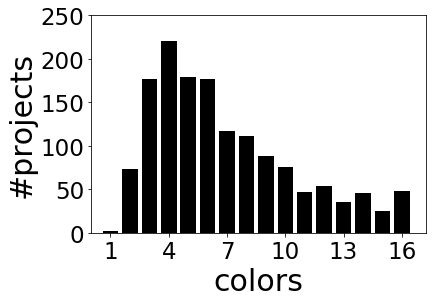

In [38]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(17)

for c in num_colors_per_proj.values():
    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_hist.svg")

In [39]:
sorted_ent_proj = sorted(entropy_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Unfinished Place World Congress Banner , entropy:  2.571020628332455 , 
desc:  Now known as Reddit World Congress was a Discord server used by many r/place diplomats to make peace treaties with other factions. The server had as many as 2.3k users at the time of r/place going down. The banner was never finished due to the project starting too late and small number of people helping to build it. https://puu.sh/v7YrL/135381821e.png 

# 1 , project:  Minor Remnant of Rainbow Road , entropy:  2.476548746053061 , 
desc:  A preserved bit of the Rainbow Road from the Cores glory days. Madoka Magica originally used it as a border for a proxy war with a Pi number. It remains as part of their banner. 

# 2 , project:  AvoArmy , entropy:  2.408796179077423 , 
desc:  a tiny pixel avocado 

# 3 , project:  Touhou Hijack , entropy:  2.407002560578154 , 
desc:  Four characters and five items from the "Touhou" series of bullet hell shooter video games; including the name of the series' 

In [40]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , entropy:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , 
desc:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  PUBG , entropy:  0.03315839180969552 , 
desc:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 4 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , 
desc:  The location of where a Bullet Kin, a c

In [41]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj.values()))))

AVG =  1.2983177994416815


In [42]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj.values()))))

STD =  0.40996469793306656


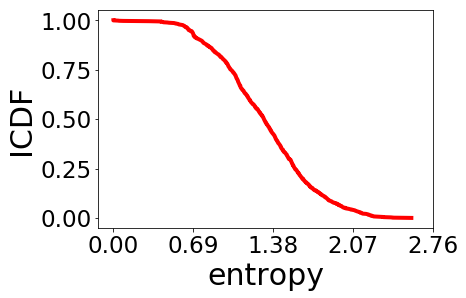

In [43]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_icdf.svg")

<a id='Colors_and_Entrpy_(Color)_per_Project_Denoised_Frequent'></a>
# Colors and Entropy (Color) per Project (Denoised Data using Frequent Color)

In [44]:
# Computing colors per project and entropies
#Only pixels (final) are considered.

colors_per_proj_den_freq = colors_per_project(input_file_proj_den_freq, projects_to_remove)
entropy_per_proj_den_freq = entropy_per_project(colors_per_proj_den_freq)

In [45]:
num_colors_per_proj_den_freq = {}

for proj in colors_per_proj_den_freq:
    num_colors_per_proj_den_freq[proj] = np.count_nonzero(colors_per_proj_den_freq[proj])

In [46]:
sorted_color_proj = sorted(num_colors_per_proj_den_freq.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  The Far Left Side , colors:  17 , 
desc:  The Far left side was made up of dedicated Leftists working together to create a community on r/place 

# 1 , project:  No Step On Snek! , colors:  17 , 
desc:  'No step on snek' is an internet meme based on the Gadsden Flag is an iconic historical American flag.Snek survived to the end! We formed a small group to work on it at /r/placesnek and made a lot of friends with various other groups on our way through the canvas. Thanks to everyone who worked with us to make hecking big danger noodle! 

# 2 , project:  Madoka Magica , colors:  17 , 
desc:  Puella Magi Madoka Magica is a magical girl anime released on-air in 2011 

# 3 , project:  Flag of Italy , colors:  17 , 
desc:  After some early squabbling with r/TFLS and r/EmpireDidNothingWrong, Italy estabilished peaceful relations with its Communist and Imperial neighbours and went on to forge a mutual assistance pact with the Brits mantaining the UK flag cluster to the right. T

In [47]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , colors:  1 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  The Red Dot , colors:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 3 , project:  PUBG , colors:  1 , 
desc:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 4 , project:  Destroyed Twenty One Pilots Logo , colors:  1 , 
desc:  Before the void took over this was the spot where the logo 

In [48]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj_den_freq.values()))))

AVG =  7.2879403794037945


In [49]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj_den_freq.values()))))

STD =  3.452212021977194


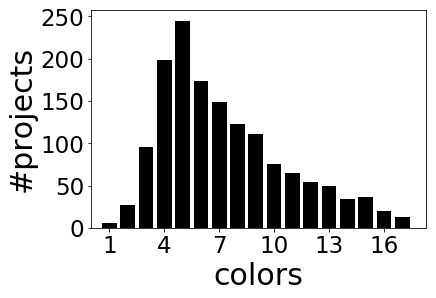

In [50]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(18)
for c in num_colors_per_proj_den_freq.values():

    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_den_freq_hist.svg")

In [51]:
sorted_ent_proj = sorted(entropy_per_proj_den_freq.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Unfinished Place World Congress Banner , entropy:  2.4688126073215972 , 
desc:  Now known as Reddit World Congress was a Discord server used by many r/place diplomats to make peace treaties with other factions. The server had as many as 2.3k users at the time of r/place going down. The banner was never finished due to the project starting too late and small number of people helping to build it. https://puu.sh/v7YrL/135381821e.png 

# 1 , project:  Touhou Hijack , entropy:  2.4324574202301426 , 
desc:  Four characters and five items from the "Touhou" series of bullet hell shooter video games; including the name of the series' creator, ZUN. 

# 2 , project:  AvoArmy , entropy:  2.4201407616633785 , 
desc:  a tiny pixel avocado 

# 3 , project:  Minor Remnant of Rainbow Road , entropy:  2.3745482475390665 , 
desc:  A preserved bit of the Rainbow Road from the Cores glory days. Madoka Magica originally used it as a border for a proxy war with a Pi number. It remains as part

In [52]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , entropy:  0.0 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  The Red Dot , entropy:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 3 , project:  PUBG , entropy:  0.0 , 
desc:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 4 , project:  Destroyed Twenty One Pilots Logo , entropy:  0.0 , 
desc:  Before the void took over this was the spot whe

In [53]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj_den_freq.values()))))

AVG =  1.3598425803842278


In [54]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj_den_freq.values()))))

STD =  0.3748321047422417


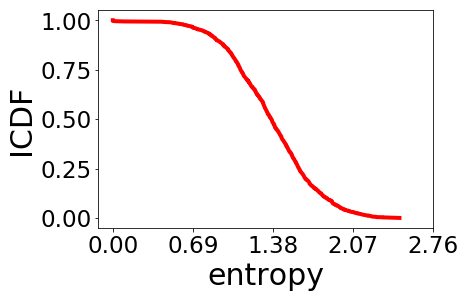

In [55]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj_den_freq.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_den_freq_icdf.svg")

<a id='Colors_and_Entropy_(Color)_per_Project_Denoised_Users'></a>
# Colors and Entropy (Color) per Project (Denoised Data using Canvas Denoised by Users)

In [56]:
# Computing colors per project and entropies
#Only pixels (final) are considered.
colors_per_proj_den_users = colors_per_project(input_file_proj_den_users, projects_to_remove)
entropy_per_proj_den_users = entropy_per_project(colors_per_proj_den_users)

In [57]:
num_colors_per_proj_den_users = {}

for proj in colors_per_proj_den_users:
    num_colors_per_proj_den_users[proj] = np.count_nonzero(colors_per_proj_den_users[proj])

In [58]:
sorted_color_proj = sorted(num_colors_per_proj_den_users.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_color_proj[i][0]
    colors = sorted_color_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 0 , project:  The Yellow Triangle , colors:  16 , 
desc:  When red, green, blue, and eventually purple claimed corners, fans of yellow attempted to carve out their own area.  After fleeing from a failed right-side colony to the left side and then losing half their territory to the rainbow, they decided to fill the triangle that it made. Agreements were made with HLG, the batman logo, babymetal, the mushroom, FRC, the Nerd Cubed N, and others, and after losing the top half of the triangle to the Poland flag, the remaining background was successfully colored yellow. A few individuals began turning part of it into a yellow/orange checkerboard pattern near the end. 

# 1 , project:  The Far Left Side , colors:  16 , 
desc:  The Far left side was made up of dedicated Leftists working together to create a community on r/place 

# 2 , project:  Pharah from Overwatch , colors:  16 , 
desc:  Pharah is one of the playable characters in Overwatch, a team-based multiplayer first-person shooter v

In [59]:
#Bottom-10

for i in range(1,11):
    proj = sorted_color_proj[-i][0]
    colors = sorted_color_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", colors: ", colors, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , colors:  1 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  Little French Flags , colors:  1 , 
desc:  Little space with cute flags. Not far from here could have been an Eiffel Tower, between the flag, Starry Night, and the ugly bitcoin mess. 

# 3 , project:  The Red Dot , colors:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 4 , project:  FRC team #4611 , colors:  1 , 
desc:  As one of thousands of FRC (below) teams, 4611 was d

In [60]:
#AVG

print("AVG = ", np.mean(np.array(list(num_colors_per_proj_den_users.values()))))

AVG =  7.025067750677507


In [61]:
#STD

print("STD = ", np.std(np.array(list(num_colors_per_proj_den_users.values()))))

STD =  3.467627338477057


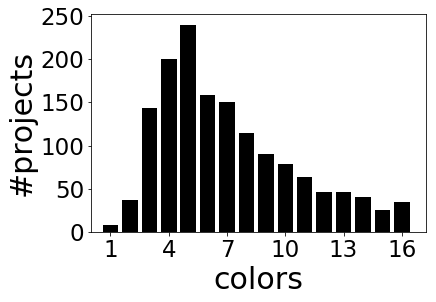

In [62]:
%matplotlib inline
def plot_colors_per_project_hst(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.bar(np.arange(count.shape[0]), count, color="black", linewidth=4)
    ax.set_ylabel('#projects', fontsize=30)
    ax.set_xlabel('colors', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(0,)
    ax.set_xticks(np.arange(1,17, 3))
    ax.set_yticks(np.arange(0, 300, 50))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

count = np.zeros(17)

for c in num_colors_per_proj_den_users.values():
    count[c] = count[c] + 1
    
plot_colors_per_project_hst(count, "../plots/plot_colors_project_den_users_hist.svg")

In [63]:
sorted_ent_proj = sorted(entropy_per_proj_den_users.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_ent_proj[i][0]
    ent = sorted_ent_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 0 , project:  Minor Remnant of Rainbow Road , entropy:  2.4774590214871446 , 
desc:  A preserved bit of the Rainbow Road from the Cores glory days. Madoka Magica originally used it as a border for a proxy war with a Pi number. It remains as part of their banner. 

# 1 , project:  The Flag of Mexico , entropy:  2.4478401487517716 , 
desc:  This is an attempt at creating a Mexican flag. Unfortunately, it was overtaken by other projects. 

# 2 , project:  AvoArmy , entropy:  2.434763398105075 , 
desc:  a tiny pixel avocado 

# 3 , project:  Portal , entropy:  2.416465187363465 , 
desc:  A portal from the game Portal by Valve. This portal and its matching orange end was drawn by /r/ainbowroad to protect a Waldo drawing from being overrun by the rainbow. The orange portal and Waldo are now mostly gone. 

# 4 , project:  Touhou Hijack , entropy:  2.402891310043159 , 
desc:  Four characters and five items from the "Touhou" series of bullet hell shooter video games; including the name of the

In [64]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ent_proj[-i][0]
    ent = sorted_ent_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", \ndesc: ", desc, "\n")

# 1 , project:  Former location of the Bullet Kin , entropy:  0.0 , 
desc:  The location of where a Bullet Kin, a common enemy from the game Enter The Gungeon, once existed. Enter the Gungeon is a bullet hell roguelike video game developed by Dodge Roll and published by Devolver Digital.<br> <br> The Bullet Kin was considered as a mascot, or "protector", of /r/TheBlueCorner despite its relatively late appearance. It was unintentionally engulfed during the final expanding of the blue corner. 

# 2 , project:  Little French Flags , entropy:  0.0 , 
desc:  Little space with cute flags. Not far from here could have been an Eiffel Tower, between the flag, Starry Night, and the ugly bitcoin mess. 

# 3 , project:  The Red Dot , entropy:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 4 , project:  FRC team #4611 , entropy:  0.0 , 
desc:  As one of thousands of FRC (below) teams

In [65]:
#AVG

print("AVG = ", np.mean(np.array(list(entropy_per_proj_den_users.values()))))

AVG =  1.3610342631383936


In [66]:
#STD

print("STD = ", np.std(np.array(list(entropy_per_proj_den_users.values()))))

STD =  0.3960494605138636


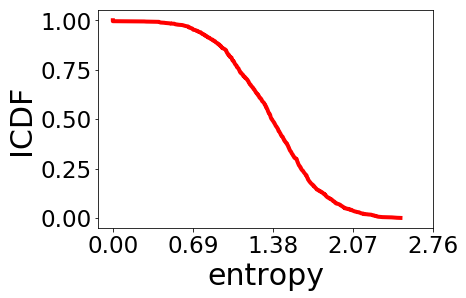

In [67]:
%matplotlib inline
def plot_color_entropies_per_project_icdf(entropy, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(entropy, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,math.exp(1)+.1, .69))
    ax.set_yticks(np.arange(0, 1.1, .25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
entropy = sorted(list(entropy_per_proj_den_users.values()))

count = np.arange(len(entropy)+1)[len(entropy)+1:0:-1]
count = count / count[0]

plot_color_entropies_per_project_icdf(entropy, count, "../plots/plot_color_entropies_den_users_icdf.svg")

<a id='Pixels_per_Project'></a>
# Pixels per Project

In [68]:
# Computing number of pixels per project
#Only pixels (final) are considered.
pixels_per_proj = pixels_per_project(input_file_proj, projects_to_remove)

In [69]:
sorted_pixel_proj = sorted(pixels_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_pixel_proj[i][0]
    pix = sorted_pixel_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", pixels: ", pix, ", \ndesc: ", desc, "\n")

# 0 , project:  Madoka Magica , pixels:  8606 , 
desc:  Puella Magi Madoka Magica is a magical girl anime released on-air in 2011 

# 1 , project:  Big Ten Corner , pixels:  8362 , 
desc:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  Starry Night , pixels:  8006 , 
desc:  The Starry Night is an oil on canvas by the Dutch post-impressionist painter Vincent van Gogh, painted in June 1889- 

# 3 , project:  RuneScape disconnected message , pixels:  7922 , 
desc:  This message is displayed when an user loses connection to the server in the MMORPG Runescape. Built by /r/runescape and /r/2007scape. 

# 4 , project:  2007s

In [70]:
#Bottom-10

for i in range(1,11):
    proj = sorted_pixel_proj[-i][0]
    pix = sorted_pixel_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", pixels: ", pix, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , pixels:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  PINLAND , pixels:  5 , 
desc:  It was very common for users to change these few pixels so the F turned into a P 

# 3 , project:  The purple corner , pixels:  9 , 
desc:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 4 , project:  Ethiopian Flag , pixels:  9 , 
desc:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 5 , project:  Eightfold , pixels:  15 , 
desc:  What remains of Eightfo

In [71]:
#AVG

print("AVG = ", np.mean(np.array(list(pixels_per_proj.values()))))

AVG =  634.0806233062331


In [72]:
#STD

print("STD = ", np.std(np.array(list(pixels_per_proj.values()))))

STD =  1038.1237581650948


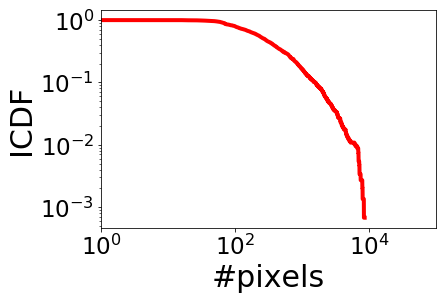

In [73]:
%matplotlib inline
def plot_pixels_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1,100000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

#Computing ICDF
count = icdf(pixels_per_proj)
    
plot_pixels_per_project_icdf(count, "../plots/plot_pixels_icdf.svg")

<a id='Projects_per_User'></a>
# Projects per User

In [74]:
#Projects per User
#Only updates that agree with the final color of the tile are considered
proj_per_user = projects_per_user(input_file_proj, projects_to_remove)

In [75]:
sorted_proj_per_user = sorted(proj_per_user.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    user = sorted_proj_per_user[i][0]
    n = sorted_proj_per_user[i][1]
    
    print("#", i, ", user: ", user, ", projects: ", n)

# 0 , user:  gIIoT+oPbML64+byH2Ms6FIj1sM= , projects:  90
# 1 , user:  Ij3o7pMe0KXqHHkMpLYeZY3lJpU= , projects:  69
# 2 , user:  oV/QBQVpRBPm5K4UoK73KXfcG0o= , projects:  60
# 3 , user:  ZSPEY69+JkkBBY/a3gb/jUvXIgA= , projects:  57
# 4 , user:  lnmjEGEWgq+s9joisWlkVYoEaUA= , projects:  51
# 5 , user:  8xow27kDaned3b13ENiuQT9fmRE= , projects:  51
# 6 , user:  NPRAwHkxG3WBneXIpPgRvWXEBJE= , projects:  48
# 7 , user:  OsnDa+2E+woJy7TN3U87yLQrbu8= , projects:  48
# 8 , user:  RfWg9AaIkgiQAB+CsEEdaWqqp0g= , projects:  46
# 9 , user:  0wE+DHwCGmhtkBF5KcyyqlDbId8= , projects:  42


In [76]:
#Bottom-10

for i in range(1,11):
    user = sorted_proj_per_user[-i][0]
    n = sorted_proj_per_user[-i][1]
    
    print("#", i, ", user: ", user, ", projects: ", n)

# 1 , user:  qnHKJsXHi0LLIHNQG762oaTm3sM= , projects:  1
# 2 , user:  O3rlOmb0o2qZie8tKKHl9smeUPw= , projects:  1
# 3 , user:  lgaE/V/9zREHrLMuFIswAvPxmew= , projects:  1
# 4 , user:  0c9D13zQkmgdniU8XVu4pXKcJIs= , projects:  1
# 5 , user:  dG3SvnzpmXW00r+Epmrcw2Q9z/I= , projects:  1
# 6 , user:  3dBq/F6V4mTlI4SCp9Ew+MG93dk= , projects:  1
# 7 , user:  zb4RPTmWb/00azu/FDHIEk9uJd4= , projects:  1
# 8 , user:  c/xCGHwfKIw5TZaKYv7kxl32H2A= , projects:  1
# 9 , user:  5tVvknRa6e7LZsD+Y2IqrXPEurE= , projects:  1
# 10 , user:  1kUgeCovEjI5tNn4H89uWMG3KUk= , projects:  1


In [77]:
#AVG

print("AVG = ", np.mean(np.array(list(proj_per_user.values()))))

AVG =  3.1857804299905


In [78]:
#STD

print("STD = ", np.std(np.array(list(proj_per_user.values()))))

STD =  2.98423862686763


In [79]:
#Median

print("Median = ", np.median(np.array(list(proj_per_user.values()))))

Median =  2.0


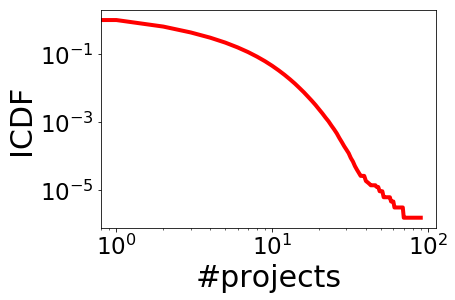

In [80]:
%matplotlib inline
def plot_projects_per_user_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#projects', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(proj_per_user)

plot_projects_per_user_icdf(count, "../plots/plot_proj_user_icdf.svg")

<a id='Users_per_Project'></a>

# Users per Project

In [ ]:
# Users per Project
#Only updates that aggree with the final color of the tile are considered
projects_to_remove = {}
users_per_proj = users_per_project(input_file_proj, projects_to_remove)   

In [ ]:
sorted_users_per_proj = sorted(users_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_users_per_proj[i][0]
    n = sorted_users_per_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", users: ", n, ", \ndesc: ", desc, "\n")

In [83]:
#Bottom-10

for i in range(1,11):
    proj = sorted_users_per_proj[-i][0]
    n = sorted_users_per_proj[-i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", users: ", n, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , users:  1 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Smiley Face , users:  6 , 
desc:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  The R , users:  7 , 
desc:  The R of the sub r/The_R 

# 4 , project:  BIGBANG , users:  9 , 
desc:  BIGBANG is a South Korean boy group who debuted in 2006 under YG Entertainment. The group, consisting of members T.O.P, Taeyang, Daesung, Seungri and leader G-Dragon are often labelled the 'Kings of K-pop' and can be considered the most influential boy group within Asia. Pictured to the left is the Bigbang crown which sits atop of the lightsticks which their fans (VIPs) wave and Bigbang concerts. 

# 5 , project:  CUL , users:  9 , 
desc:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
T

In [84]:
#AVG

print("AVG = ", np.mean(np.array(list(users_per_proj.values()))))

AVG =  1404.0873983739837


In [85]:
#STD

print("STD = ", np.std(np.array(list(users_per_proj.values()))))

STD =  3461.045382058789


In [86]:
#Median
print("Median = ", np.median(np.array(list(users_per_proj.values()))))

Median =  382.0


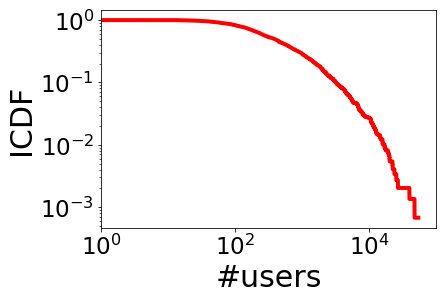

In [87]:
%matplotlib inline
def plot_users_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.loglog(np.arange(count.shape[0]), count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlim(1, 100000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
count = icdf(users_per_proj)

plot_users_per_project_icdf(count, "../plots/plot_user_proj_icdf.svg")

<a id='Time_per_Project'></a>
# Time per Project

In [88]:
#Time per project
#Only updates that aggree with the final color of the tile are considered
times_per_proj = times_per_project(input_file_proj, projects_to_remove)

In [89]:
sorted_times_per_proj = sorted(times_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_times_per_proj[i][0]
    t = sorted_times_per_proj[i][1] / (1000 * 60 * 60)
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", time: ", t, ", \ndesc: ", desc, "\n")

# 0 , project:  The Void Prism , time:  87.43916666666667 , 
desc:  The void was an ever-expanding area of darkness, until it was filled with the Prism from the album art of Pink FLoyd's Dark Side of the Moon. 

# 1 , project:  Rainbow Grid , time:  85.22777777777777 , 
desc:  Started and initially maintained by a single individual, this eventually became "hiveminded" - maintained entirely by an unorganized group of random individuals. It was abandoned by its creator and given to r/EraseThePlace, being long time allies. ETP gladly began their work, though resistance was met with the arrival of The Gray Thing... 

# 2 , project:  Nine Inch Nails , time:  84.48694444444445 , 
desc:  The logo of the industrial rock band Nine Inch Nails, appropriately glitched out by random pixels. 

# 3 , project:  Radiohead , time:  84.45916666666666 , 
desc:  A section staked out by fans of British art rock band Radiohead. Drawn here are the band's "Modified Bear" mascot and the corrupted text from the 

In [90]:
#Bottom-10

for i in range(1,11):
    proj = sorted_times_per_proj[-i][0]
    t = sorted_times_per_proj[-i][1] / (1000 * 60 * 60)
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", time: ", t, ", \ndesc: ", desc, "\n")

# 1 , project:  The Red Dot , time:  0.0 , 
desc:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Seventeen , time:  10.676111111111112 , 
desc:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 3 , project:  Make Trade Fair , time:  16.12527777777778 , 
desc:  An organization supported by frontman Chris Martin of Coldplay drawn by the nearby Coldplay redditors. 

# 4 , project:  TOPS , time:  21.069166666666668 , 
desc:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 5 , project:  Tiny Flaggy Flag , time:  31.919444444444444 , 
desc:  Flaggy Flag is the Rebel Flag of the Hello Internet Podcast with Dr. Brady Haran and his 

In [91]:
#AVG (hours)

print("AVG = ", np.mean(np.array(list(times_per_proj.values())))/(1000 * 60 * 60))

AVG =  69.50528060072267


In [92]:
#STD (hours)

print("STD = ", np.std(np.array(list(times_per_proj.values())))/(1000 * 60 * 60))

STD =  4.827342776084779


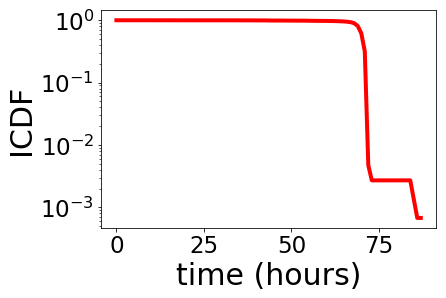

In [93]:
%matplotlib inline
def plot_times_per_project_icdf(count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.semilogy(np.arange(count.shape[0]), count, color="red", linewidth=4) #millisecons to hours
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,101,25))
    #ax.set_xlim(None, 100)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
#Computing ICDF
times_per_proj_hours = {}

for proj in times_per_proj:
    times_per_proj_hours[proj] = int(times_per_proj[proj] / (1000 * 60 * 60))

count = icdf(times_per_proj_hours)

plot_times_per_project_icdf(count, "../plots/plot_time_proj_icdf.svg")

<a id='Area_per_Project'></a>
# Area per Project

In [94]:
#Area per project (area is between 0 to 1)
#input_file_proj= "../data/sorted_tile_placements_proj.csv"
area_per_proj = area_per_project(input_file_proj,projects_to_remove)

In [95]:
sorted_area_per_proj = sorted(area_per_proj.items(), key=operator.itemgetter(1), reverse=True)

#Top-10
for i in range(10):
    proj = sorted_area_per_proj[i][0]
    a = sorted_area_per_proj[i][1]
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", area: ", a, ", \ndesc: ", desc, "\n")

# 0 , project:  Flag of Switzerland , area:  1.0 , 
desc:   

# 1 , project:  Flag of Lithuania , area:  1.0 , 
desc:   

# 2 , project:  Lego , area:  1.0 , 
desc:  Lego is a line of plastic construction toys made in Denmark. 

# 3 , project:  Trogdor the Burninator , area:  1.0 , 
desc:  Trogdor the Burninator is a figure from the Homestar Runner internet cartoon series. 

# 4 , project:  Factorio , area:  1.0 , 
desc:  Factorio is a real-time strategy video game with base-building and management elements developed by Wube Software. 

# 5 , project:  European Union , area:  1.0 , 
desc:  After a long battle between /r/france and /r/de, both parties negotiated peace and placed the flag of the EU with a dove of peace on the disputed territory. 

# 6 , project:  Flag of Germany , area:  1.0 , 
desc:   

# 7 , project:  Flag of South Africa , area:  1.0 , 
desc:   

# 8 , project:  Flag of Belgium , area:  1.0 , 
desc:   

# 9 , project:  Bitcoin , area:  1.0 , 
desc:  Bitcoin is a crypt

In [96]:

#Bottom-10
for i in range(1,11):
    proj = sorted_area_per_proj[-i][0]
    a = sorted_area_per_proj[-i][1] 
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    print("#", i, ", project: ", name, ", area: ", a, ", \ndesc: ", desc, "\n")

# 1 , project:  The Dutch Border , area:  0.060002013490385586 , 
desc:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. The first made steps of this plan, the orange colour and the border flag, still remains. 

# 2 , project:  /r/parahumans worm , area:  0.06153541749109616 , 
desc:  It's a worm created by the subreddit /r/parahumans.
It doubles as a tail for "The Beast". Although it was developed independently initially, /r/Portugal suggested that its head popped up on their side, which was agreed upon. It also features a traditional Portuguese hat with national colors. 

# 3 , project:  The Dutch border , area:  0.08088080501873605 , 
desc:  

In [97]:
#AVG 

print("AVG = ", np.mean(np.array(list(area_per_proj.values()))))

AVG =  0.8033819121231359


In [98]:
#STD 

print("STD = ", np.std(np.array(list(area_per_proj.values())))/(1000 * 60 * 60))

STD =  5.3129620536929405e-08


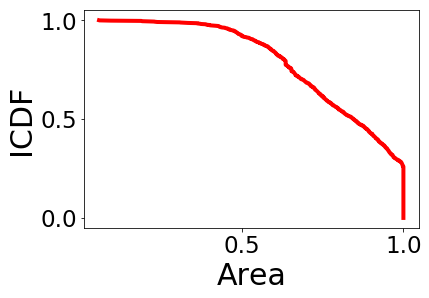

In [99]:
%matplotlib inline
def plot_area_per_project_icdf(area, count, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.plot(area, count, color="red", linewidth=4)
    ax.set_ylabel('ICDF', fontsize=30)
    ax.set_xlabel('Area', fontsize=30)
    ax.tick_params(labelsize=23)
    #ax.set_xticks(np.arange(0,101,25))
    #ax.set_xlim(None, 100)
    #ax.set_yticks(np.arange(0,1.1,0.25))
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')
    
    
#Computing ICDF
area = sorted(list(area_per_proj.values()))
count = np.arange(len(area)+1)[len(area)+1:0:-1]
count = count / count[0]


plot_area_per_project_icdf(area,count, "../plots/plot_area_proj_icdf.svg")

# Two Variables

<a id='Update_vs_Entropy'></a>
# Update vs Entropy

In [100]:
#Updates vs. entropy 
X,Y = Create_Array(updates_per_proj,entropy_per_proj)

#Updates vs.entropy: ratio and ID
ratios, IDs = Ratio(updates_per_proj,entropy_per_proj, names)


In [101]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [102]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.08540345],
       [0.08540345, 1.        ]])

In [103]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", entropy: ", ent, ", updates: ", up, ", entropy/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Red P , entropy:  1.2226561670871259 , updates:  126 , entropy/update:  0.009703620373707348         , 
description:  Seeing the whole work was an amazing piece of modern art, I really wanted to be a part of it. I decided to find a small unused spot and put my initial there. The void and erase factions were savage and had wiped two previous efforts and a larger piece of art I was helping maintain, so I found a spot and used a script running on 2 PC's to maintain my small part of the artwork until place ended, which happened while I was sleeping. 

# 1 , project:  Tiny danish flag , entropy:  1.0821955300387671 , updates:  112 , entropy/update:  0.00966246008963185         , 
description:  denmark is a samll nation in the nothern part of europe 

# 2 , project:  Italy heart , entropy:  1.1115310092213608 , updates:  128 , entropy/update:  0.008683836009541882         , 
description:  A random heart or a symbol of cooperation between Scott Pilgrim and Italy? 

# 3 , proje

In [104]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", updates: ", up, ", entropy/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  The Red Dot , entropy:  0.0 , updates:  17 , entropy/update:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , updates:  2328 , entropy/update:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  The Blue Empire , entropy:  0.5238789747161786 , updates:  359971 , entropy/update:  1.4553366096607187e-06         , 
description:  A simple project started to make the bottom right corner completely

<Figure size 432x288 with 0 Axes>

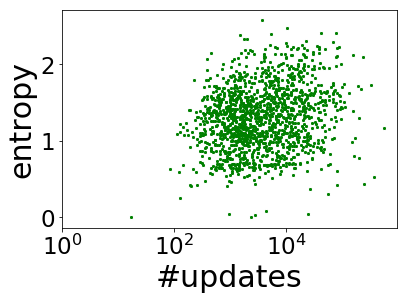

In [105]:
%matplotlib inline

def plot_updates_vs_entropy(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    #ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(1,None)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_entropy(X, Y, "../plots/plot_updates_vs_entropy.svg")

5

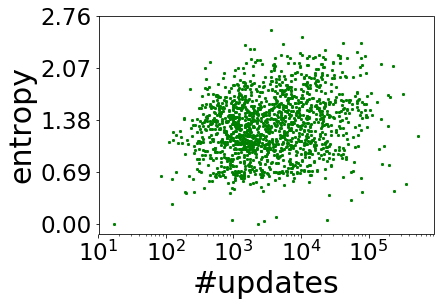

In [106]:
#Showing project IDs on mouse hovering. Based on:
#https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

%matplotlib tk
cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yticks(np.arange(np.min(Y),math.exp(1)+.1, .69))
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_Pixel'></a>
# Update vs Pixel

In [107]:
#Updates vs. Pixels 
X,Y = Create_Array(updates_per_proj,pixels_per_proj)


#Updates vs. pixels: ratio and ID
ratios, IDs = Ratio(updates_per_proj,pixels_per_proj, names)

In [108]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [109]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.75917746],
       [0.75917746, 1.        ]])

In [110]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    pix = pixels_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", pixels: ", pix, ", updates: ", up, ", pixels/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Seplunky , pixels:  370 , updates:  937 , pixels/update:  0.39487726787620064         , 
description:  Player character from the platform indie game Spelunky. 

# 1 , project:  Bread , pixels:  70 , updates:  183 , pixels/update:  0.3825136612021858         , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 2 , project:  Amaura , pixels:  50 , updates:  142 , pixels/update:  0.352112676056338         , 
description:  The head of the Generation 6 Fossil Pokémon Amaura. The body was covered up by surrounding art. 

# 3 , project:  Toucan , pixels:  347 , updates:  1060 , pixels/update:  0.3273584905660377         , 
description:  le tou

In [111]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    pix = pixels_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i,", project: ", name, ", pixels: ", pix, ", updates: ", up, ", pixels/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  The purple corner , pixels:  9 , updates:  20703 , pixels/update:  0.000434719605854224         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  PINLAND , pixels:  5 , updates:  5493 , pixels/update:  0.0009102494083378846         , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 3 , project:  Trans Heart , pixels:  61 , updates:  20308 , pixels/update:  0.003003742367539886         , 
description:  The first heart created by /r/TransFlagPlace, marking the centerpoint of the flag. 

# 4 , project:  Hammer and Sickle , pixels:  835 , updates:  169074 , pixels/update:  0.004938665909601713     

<Figure size 432x288 with 0 Axes>

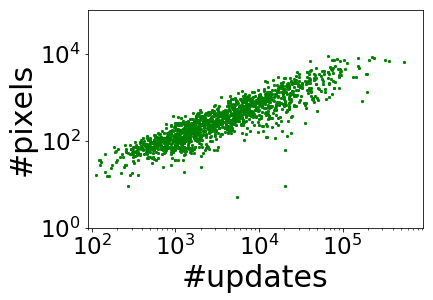

In [112]:
%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,100000)
    ax.set_xlim(90,None)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_pixels(X, Y, "../plots/plot_updates_vs_pixels.svg")

5

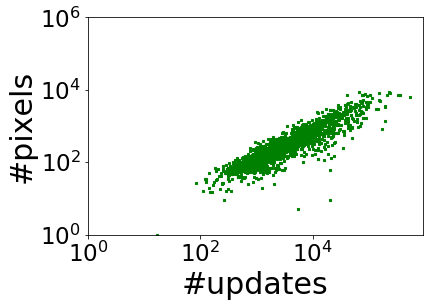

In [113]:
#Showing project IDs on mouse hovering. Based on:
#https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib

%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#pixels', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,None)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_User'></a>
# Update vs User

In [114]:
#Updates vs. users per project
X,Y = Create_Array(updates_per_proj, users_per_proj)

#Updates vs. users: ratio and ID
ratios, IDs = Ratio(updates_per_proj,users_per_proj, names)

In [115]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [116]:
#Correlation
np.corrcoef(X, Y)

array([[1.        , 0.92640902],
       [0.92640902, 1.        ]])

In [117]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", updates: ", up, ", users/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  Juke Juice power-up , users:  346 , updates:  817 , users/update:  0.423500611995104         , 
description:  Juke Juice allows you to accelerate and reach your maximum speed at faster rates, making it easier to avoid contact with other players and escape tricky situations. 

# 1 , project:  73 and 35 , users:  975 , updates:  2581 , users/update:  0.37776055792328556         , 
description:  73 and 35 refers to an Oldschool Runescape PKer B0aty.<br>73 refers to an old vide of his where his friend bets him he won't die to a weapon when he is at 73 health, and immediately after gets hit a 73.<br>35 refers to him getting hit with an obscure weapon called a Dragon Warhammer during his stream of Deadman mode, a special PvP mode of Oldschool Runescape. 

# 2 , project:  The Swiss Heart , users:  249 , updates:  664 , users/update:  0.375         , 
description:  The heart of Switzerland, defended by /r/SwissNeutralityZone 

# 3 , project:  The Tree , users:  266 , updates:  

In [118]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", updates: ", up, ", users/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  venus , users:  204 , updates:  10008 , users/update:  0.02038369304556355         , 
description:   

# 2 , project:  A-NI , users:  42 , updates:  1970 , users/update:  0.02131979695431472         , 
description:  Anti-Nub Incorporated (A-NI) is an EVE: Online based corporation, branching out to other games such as Dota 2. 

# 3 , project:  Parrot , users:  122 , updates:  5589 , users/update:  0.021828591876901057         , 
description:   Our cute little birb.  Drawn by members of /r/Parrots. 

# 4 , project:  The Purple Heart , users:  18 , updates:  760 , users/update:  0.02368421052631579         , 
description:  The purple heart you see here is one of the few things that has been here from start to finish. It was done almost single handedly by Reddit user IceNinjaPants. After a vent on reddit place, /r/placehearts refused to help as they already had their hands full.
The purple heart survived an attack from a white void, and a giant face.
The heart now represent

<Figure size 432x288 with 0 Axes>

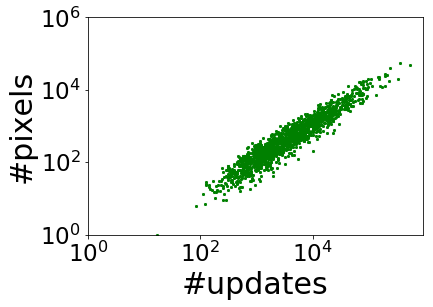

In [119]:
%matplotlib inline

def plot_updates_vs_pixels(X, Y, output_file_name):
    plt.clf()
    fig, ax = plt.subplots()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#pixels', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,1000000)
    ax.set_xlim(1,None)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_pixels(X, Y, "../plots/plot_updates_vs_users.svg")

5

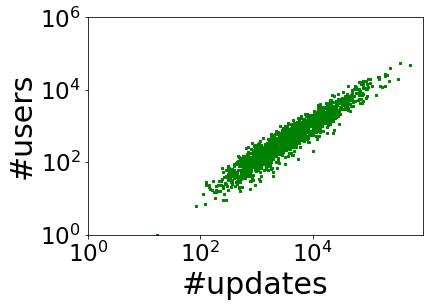

In [120]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#users', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,None)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_Time'></a>
# Update vs Time

In [121]:

#Updates vs. time per project
X,Y = Create_Array(updates_per_proj, times_per_proj)

#Updates vs. time: ratio and ID
ratios, IDs = Ratio(updates_per_proj,times_per_proj, names)

In [122]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [123]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14376751],
       [0.14376751, 1.        ]])

In [124]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/ (1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", updates: ", up, ", times/update: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 0 , project:  Tiny danish flag , time:  65.10416666666667 , updates:  112 , times/update:  0.5812872023809524         , 
description:  denmark is a samll nation in the nothern part of europe 

# 1 , project:  St.Georges Flag , time:  70.94416666666666 , updates:  125 , times/update:  0.5675533333333334         , 
description:  Created by /u/tinysocksb. The piece took several hours to create and was destroyed for reasons unknown, replaced by black blocks the space appears unused. Picture can be seen below on imgur. 

# 2 , project:  The R , time:  65.53111111111112 , updates:  121 , times/update:  0.5415794306703398         , 
description:  The R of the sub r/The_R 

# 3 , project:  Italy heart , time:  68.73277777777778 , updates:  128 , times/update:  0.5369748263888889         , 
description:  A random heart or a symbol of cooperation between Scott Pilgrim and Italy? 

# 4 , project:  Red P , time:  66.35027777777778 , updates:  126 , times/update:  0.5265895061728395         , 
de

In [125]:
#Bottom-10    
for i in range(1, 11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/ (1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", updates: ", up, ", times/update: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 1 , project:  The Red Dot , time:  0.0 , updates:  17 , times/update:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  osu! Logo , time:  70.93416666666667 , updates:  544512 , times/update:  0.0001302710806495847         , 
description:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 3 , project:  The Blue Empire , time:  71.98194444444445 , updates:  359971 , times/update:  0.00019996595404753284         , 
description:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half

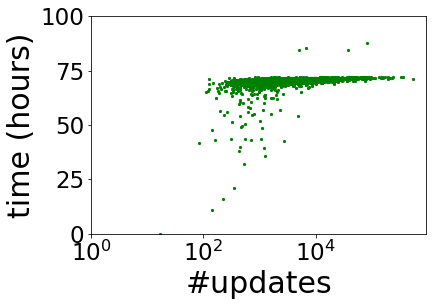

In [126]:
%matplotlib inline
Y=Y/ (1000 * 60 * 60)
def plot_updates_vs_times(X, Y, output_file_name):
    plt.clf()
    ax = plt.subplot()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim(1,None)
    ax.set_ylim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_times(X, Y, "../plots/plot_updates_vs_times.svg")

5

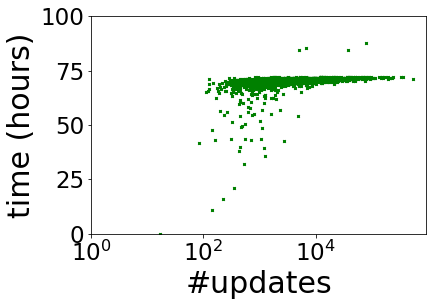

In [127]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_xlim(1,None)
ax.set_ylim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Update_vs_Area'></a>
# Update vs Area

In [128]:
#Updates vs. area per project
X,Y = Create_Array(updates_per_proj, area_per_proj)

#Updates vs. time: ratio and ID
ratios, IDs = Ratio(updates_per_proj,area_per_proj, names)

In [129]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [130]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.00942929],
       [-0.00942929,  1.        ]])

In [131]:
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ar = area_per_proj[proj] 
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", updates: ", up, ", area/update: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  The Red Dot , area:  1.0 , updates:  17 , area/update:  0.058823529411764705         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 1 , project:  Tiny danish flag , area:  1.0 , updates:  112 , area/update:  0.008928571428571428         , 
description:  denmark is a samll nation in the nothern part of europe 

# 2 , project:  Smiley Face , area:  0.75 , updates:  84 , area/update:  0.008928571428571428         , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  The R , area:  1.0 , updates:  121 , area/update:  0.008264462809917356         , 
description:  The R of the sub r/The_R 

# 4 , project:  St.Georges Flag , area:  1.0 , updates:  125 , area/update:  0.008         , 
description:  Created by /u/tinysocksb. The piece took several hours to create and was destroyed for reasons unknown, re

In [132]:
#Bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ar = area_per_proj[proj] 
    up = updates_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", updates: ", up, ", area/update: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  Big Ten Corner , area:  0.26645847938308587 , updates:  227597 , area/update:  1.1707468876263127e-06         , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  osu! Logo , area:  0.7994145348097238 , updates:  544512 , area/update:  1.4681302428775193e-06         , 
description:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 3 , project:  The Sover

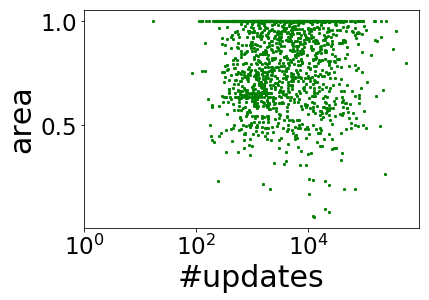

In [133]:
%matplotlib inline
def plot_updates_vs_area(X, Y, output_file_name):
    plt.clf()
    ax = plt.subplot()
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#updates', fontsize=30)
    ax.set_xscale('log')
    ax.set_xlim(1,None)
    #ax.set_ylim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_updates_vs_area(X, Y, "../plots/plot_updates_vs_area.svg")

5

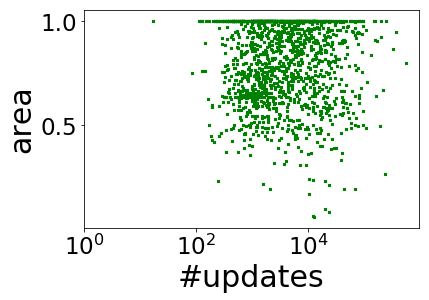

In [134]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#updates', fontsize=30)
ax.set_xscale('log')
ax.set_xlim(1,None)
#ax.set_ylim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Entropy'></a>
# Pixels vs Entropy

In [135]:
#Pixels vs. entropy per project
X,Y = Create_Array(pixels_per_proj, entropy_per_proj)

#Pixels vs. entropy: ratio and ID
ratios, IDs = Ratio(pixels_per_proj,entropy_per_proj, names)

In [136]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [137]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.23421531],
       [0.23421531, 1.        ]])

In [138]:
#Entropy/pixel
  
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", pixels: ", pix, ", entropy/pixel: ", r, "\
        , \ndescription: ", desc, "\n")     

# 0 , project:  Ethiopian Flag , entropy:  1.310783678099714 , pixels:  9 , entropy/pixel:  0.1456426308999682         , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 1 , project:  The purple corner , entropy:  1.2148896539491205 , pixels:  9 , entropy/pixel:  0.13498773932768005         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  PINLAND , entropy:  0.6730116670092565 , pixels:  5 , entropy/pixel:  0.1346023334018513         , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 3 , project:  Eightf

In [139]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    ent = entropy_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", pixels: ", pix, ", entropy/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , entropy:  0.0 , pixels:  1 , entropy/pixel:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , pixels:  144 , entropy/pixel:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , pixels:  900 , entropy/pixel:  4.814575201961e-05         , 
description:  The location of where a Bullet Kin, a common enemy from the game 

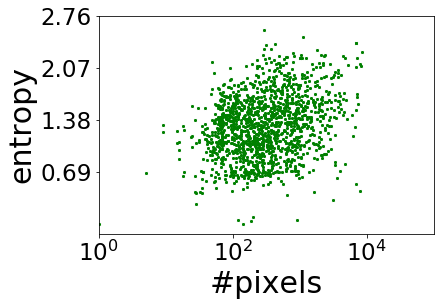

In [140]:
%matplotlib inline
def plot_pixels_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xscale('log')
    ax.set_xlim(1,100000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_entropy(X, Y, "../plots/plot_pixels_vs_entropy.svg")

5

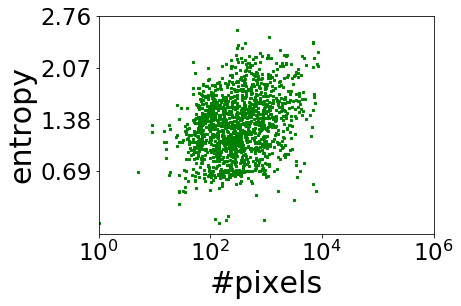

In [141]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xscale('log')
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Users'></a>
# Pixels vs Users

In [142]:
#Pixels vs. users per project
X,Y = Create_Array(pixels_per_proj, users_per_proj)

#Pixels vs. users: ratio and ID
ratios, IDs = Ratio(pixels_per_proj,users_per_proj, names)

In [143]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [144]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.72397802],
       [0.72397802, 1.        ]])

In [145]:
#users/pixel
  
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    usr = users_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", pixels: ", pix, ", users/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  The purple corner , users:  3689 , pixels:  9 , users/pixel:  409.8888888888889         , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 1 , project:  PINLAND , users:  1614 , pixels:  5 , users/pixel:  322.8         , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 2 , project:  Trans Heart , users:  3049 , pixels:  61 , users/pixel:  49.98360655737705         , 
description:  The first heart created by /r/TransFlagPlace, marking the centerpoint of the flag. 

# 3 , project:  Kirby , users:  8626 , pixels:  250 , users/pixel:  34.504         , 
description:  The remnants of a sprite of the video game char

In [146]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    usr = users_per_proj[proj]
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", users: ", usr, ", pixels: ", pix, ", users/pixel: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  Bread , users:  10 , pixels:  70 , users/pixel:  0.14285714285714285         , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 2 , project:  Seplunky , users:  59 , pixels:  370 , users/pixel:  0.15945945945945947         , 
description:  Player character from the platform indie game Spelunky. 

# 3 , project:  Ashley , users:  52 , pixels:  326 , users/pixel:  0.15950920245398773         , 
description:  Ashley is a young witch who lives alone in a haunted mansion in Diamond City. While her spells are mighty and powerful, she secretly longs for friends to talk to. She appears in the WarioWare game series, with her most recent appear

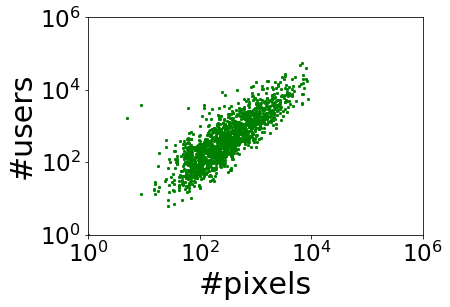

In [147]:
%matplotlib inline
def plot_pixels_vs_users(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('#users', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(1,1000000)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_users(X, Y, "../plots/plot_pixels_vs_users.svg")

5

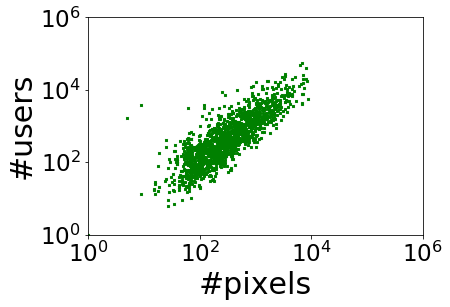

In [148]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('#users', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(1,1000000)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Time'></a>
# Pixels vs Time

In [149]:
#Pixels vs. time per project
X,Y = Create_Array(pixels_per_proj, times_per_proj)

#Pixels vs. area: ratio and ID
ratios, IDs = Ratio(pixels_per_proj, times_per_proj, names)

In [150]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [151]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.20446007],
       [0.20446007, 1.        ]])

In [152]:
 #Time/Pixel
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/(1000 * 60 * 60)
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", pixels: ", pix, ", time/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 
    

# 0 , project:  PINLAND , time:  65.33944444444444 , pixels:  5 , time/pixel:  13.06788888888889        , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 1 , project:  The purple corner , time:  71.92555555555556 , pixels:  9 , time/pixel:  7.991728395061729        , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/purplepixels. However, like all of the colour factions that dominated the early Place, the purple corner was eventually crowded out by pixel art. 

# 2 , project:  Ethiopian Flag , time:  56.03638888888889 , pixels:  9 , time/pixel:  6.226265432098765        , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 3 , project:  Stealth Pepe , time:  69.48083333

In [153]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", pixels: ", pix, ", time/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , time:  0.0 , pixels:  1 , time/pixel:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  Madoka Magica , time:  71.48638888888888 , pixels:  8606 , time/pixel:  0.008306575515790017         , 
description:  Puella Magi Madoka Magica is a magical girl anime released on-air in 2011 

# 3 , project:  Big Ten Corner , time:  71.62777777777778 , pixels:  8362 , time/pixel:  0.00856586675170746         , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 4 ,

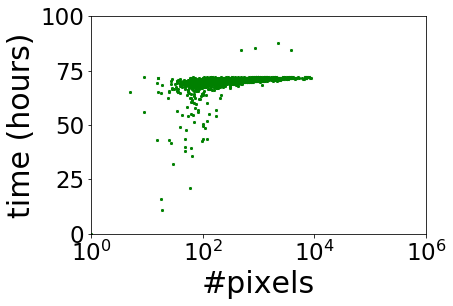

In [154]:
%matplotlib inline
Y= Y/(3600*1000)
def plot_pixels_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_times(X, Y, "../plots/plot_pixels_vs_times.svg")

5

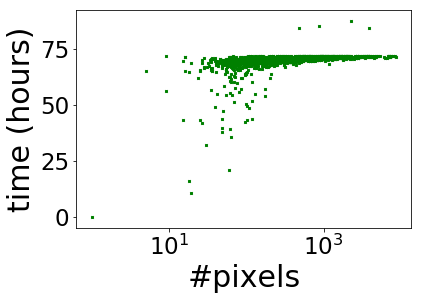

In [155]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
#ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Pixels_vs_Area'></a>
# Pixels vs Area

In [156]:
#Pixels vs. area per project
X,Y = Create_Array(pixels_per_proj, area_per_proj)

#Pixels vs. area: ratio and ID
ratios, IDs = Ratio(pixels_per_proj, area_per_proj, names)

In [157]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [158]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.05629574],
       [-0.05629574,  1.        ]])

In [159]:
 #Area/Pixel
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ar = area_per_proj[proj] 
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", pixels: ", pix, ", area/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  The Red Dot , area:  1.0 , pixels:  1 , area/pixel:  1.0        , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 1 , project:  PINLAND , area:  0.625 , pixels:  5 , area/pixel:  0.125        , 
description:  It was very common for users to change these few pixels so the F turned into a P 

# 2 , project:  Ethiopian Flag , area:  1.0 , pixels:  9 , area/pixel:  0.1111111111111111        , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 3 , project:  The purple corner , area:  1.0 , pixels:  9 , area/pixel:  0.1111111111111111        , 
description:  Originally a "colony" of the blue corner, a loss of interest among blue corner pixel-placers lead to the upper-left corner of the canvas being taken over by the faction that would eventually become /r/pur

In [160]:
 #bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ar = area_per_proj[proj] 
    pix = pixels_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", pixels: ", pix, ", area/pixel: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  Big Ten Corner , area:  0.26645847938308587 , pixels:  8362 , area/pixel:  3.1865400548084894e-05        , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  The Dutch border , area:  0.08088080501873605 , pixels:  1921 , area/pixel:  4.210349037935245e-05        , 
description:  used by the netherlands as border for created projects and to mark of or expand to new territory. It represents the Dutch flag  

# 3 , project:  Parahumans , area:  0.19071626470454647 , pixels:  4199 , area/pixel:  4.5419448607893895e-05        , 
description:  Banner for /r/parahumans, fan subreddit for web seria

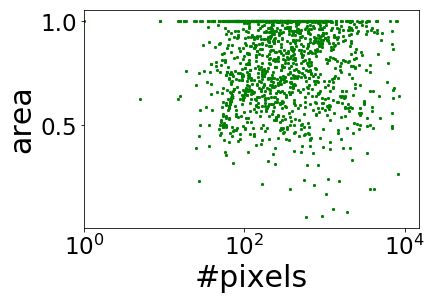

In [161]:
%matplotlib inline
def plot_pixels_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#pixels', fontsize=30)
    ax.set_xscale('log')
    #ax.set_ylim(0,100)
    ax.set_xlim(1,15000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_pixels_vs_area(X, Y, "../plots/plot_pixels_vs_area.svg")

5

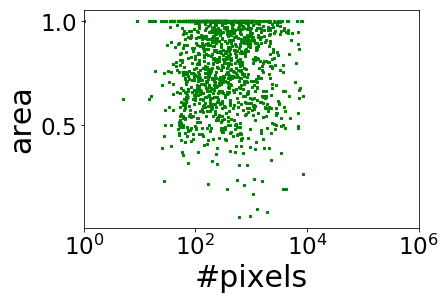

In [162]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#pixels', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Users_vs_Entropy'></a>
# Users_vs_Entropy

In [163]:
#Users vs. entropy per project

X,Y = Create_Array(users_per_proj, entropy_per_proj)

#Users vs. entropy: ratio and ID
ratios, IDs = Ratio(users_per_proj, entropy_per_proj, names)

In [164]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [165]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.04768032],
       [0.04768032, 1.        ]])

In [166]:
 #Entropy/user
#Top-10

for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", users: ", usr, ", entropy/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 0 , project:  Bread , entropy:  1.3981439712463501 , users:  10 , entropy/user:  0.139814397124635        , 
description:  A loaf of Bread constructed by a few users of Anarchist subreddits to represent the ideas of Pyotr Kropotkin, Russian anarchist and author of the influential anarchist book, 'The Conquest of Bread'. Since this was a relatively late addition to the place, and is not a particularly obviously Leftist symbol, the Bread saw little vandalism and required no bots to maintain. 

# 1 , project:  Smiley Face , entropy:  0.6365141682948128 , users:  6 , entropy/user:  0.10608569471580213        , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 2 , project:  Ethiopian Flag , entropy:  1.310783678099714 , users:  13 , entropy/user:  0.100829513699978        , 
description:  The flag of the african country of Ethiopia. It was created and maintained by a single user (/u/faithfuljohn), hence why it is so small. 

# 3 , project:  M

In [167]:
 #Entropy/user
#Bottom-10

for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
        
    name = names[int(proj)]
    desc = descriptions[int(proj)]
   
    
    ent = entropy_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", users: ", usr, ", entropy/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , entropy:  0.0 , users:  1 , entropy/user:  0.0        , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , users:  641 , entropy/user:  0.0        , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , users:  6866 , entropy/user:  6.310978272305418e-06        , 
description:  The location of where a Bullet Kin, a common enemy from the game Enter

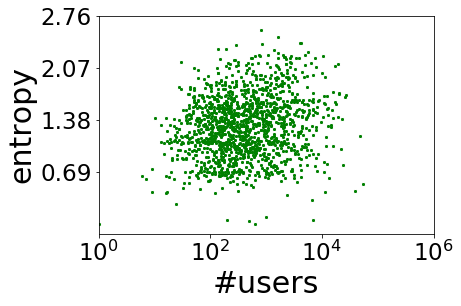

In [168]:
%matplotlib inline
def plot_users_vs_entropy(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('entropy', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    ax.set_yticks(np.arange(0.69, math.exp(1)+.1, .69))
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_entropy(X, Y, "../plots/plot_users_vs_entropy.svg")

5

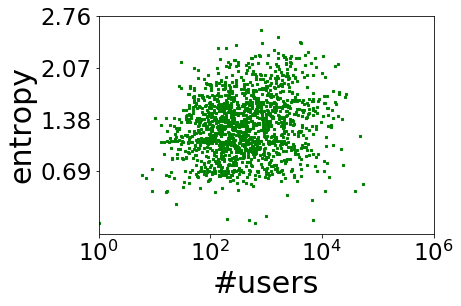

In [169]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('entropy', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
ax.set_yticks(np.arange(0.69, math.exp(1)+.1, .69))
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Users_vs_Time'></a>
# Users vs Time

In [170]:
#Users vs. time per project
X,Y = Create_Array(users_per_proj, times_per_proj)

#Users vs. time: ratio and ID
ratios, IDs = Ratio(users_per_proj, times_per_proj, names)

In [171]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [172]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14977008],
       [0.14977008, 1.        ]])

In [173]:
#Time/User
#Top -10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/ (1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", users: ", usr, ", time/user: ", r, "\
        , \ndescription: ", desc, "\n")    

# 0 , project:  The R , time:  65.53111111111112 , users:  7 , time/user:  9.361587301587301         , 
description:  The R of the sub r/The_R 

# 1 , project:  CUL , time:  68.76416666666667 , users:  9 , time/user:  7.640462962962963         , 
description:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
This masterpiece is the work of Marvolo and Nicho. This is our gift to the internet. 

# 2 , project:  BIGBANG , time:  68.70333333333333 , users:  9 , time/user:  7.633703703703703         , 
description:  BIGBANG is a South Korean boy group who debuted in 2006 under YG Entertainment. The group, consisting of members T.O.P, Taeyang, Daesung, Seungri and leader G-Dragon are often labelled the 'Kings of K-pop' and can be considered the most influential boy group within Asia. Pictured to the left is the Bigbang crown which sits atop of the lightsticks which their fans (VIPs) wave and Bigbang concerts. 

# 3 , project:  Smi

In [174]:
#Time/User
#Bottom -10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", time: ", tm, ", users: ", usr, ", time/user: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Red Dot , time:  0.0 , users:  1 , time/user:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  The Blue Empire , time:  71.98194444444445 , users:  54510 , time/user:  0.0013205273242422391         , 
description:  A simple project started to make the bottom right corner completely blue, quickly grew to be the largest piece of art in r/place history. Within 12 hours it had covered more than half of the bottom canvas, completely in blue, with thousand of dedicated supporters. The blue corner was pushed back gradually as more organised projects superseded the early pattern-based structures. The current blue corner is a mere reminder of what the empire was in it's former glory. 

# 3 , project:  osu! Logo , time:  70.93416666666667 , users:  47727 , time/user:  0.0014862481753863989         , 
description:  The logo for the rhy

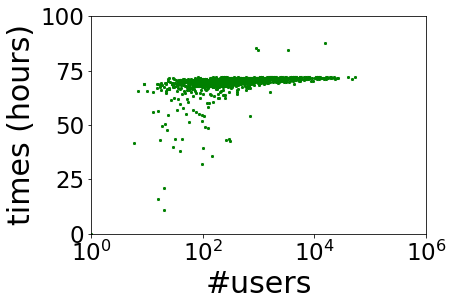

In [175]:
%matplotlib inline
Y = Y/(1000 * 60 * 60)
def plot_users_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_times(X, Y, "../plots/plot_users_vs_times.svg")

5

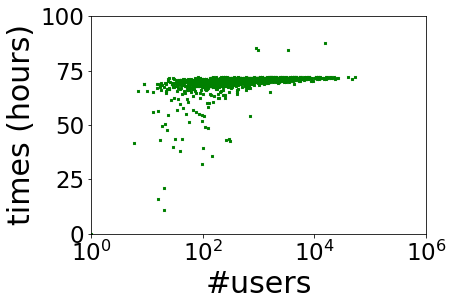

In [176]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Users_vs_Area'></a>
# Users vs Area

In [177]:
#Users vs. area per project
X,Y = Create_Array(users_per_proj, area_per_proj)

#Users vs. area: ratio and ID
ratios, IDs = Ratio(users_per_proj, area_per_proj, names)

In [178]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [179]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.00134748],
       [-0.00134748,  1.        ]])

In [180]:
#Area/User
#Top -10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", users: ", usr, ", area/user: ", r, "\
        , \ndescription: ", desc, "\n")   

# 0 , project:  The Red Dot , area:  1.0 , users:  1 , area/user:  1.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 1 , project:  The R , area:  1.0 , users:  7 , area/user:  0.14285714285714285         , 
description:  The R of the sub r/The_R 

# 2 , project:  Smiley Face , area:  0.75 , users:  6 , area/user:  0.125         , 
description:  A universal symbol of happiness rendered on a small scale for bite sized fun. 

# 3 , project:  CUL , area:  0.8909090909090909 , users:  9 , area/user:  0.09898989898989899         , 
description:  CUL means "ass" in french.
We are very proud to have written this word a few hours before the end of /r/place.
This masterpiece is the work of Marvolo and Nicho. This is our gift to the internet. 

# 4 , project:  Tiny danish flag , area:  1.0 , users:  13 , area/user:  0.07692307692307693         , 
description:  denmark is

In [181]:
#Area/User
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    usr = users_per_proj[proj]
    
    print("#", i, ", project: ", name, ", area: ", ar, ", users: ", usr, ", area/user: ", r, "\
        , \ndescription: ", desc, "\n")  

# 1 , project:  Big Ten Corner , area:  0.26645847938308587 , users:  17002 , area/user:  1.5672184412603567e-05         , 
description:  11 of the 14 teams in the Big Ten have their logo represented in this part of r/place.<br>The Big Ten Conference (B1G), is the oldest Division I collegiate athletic conference in the United States. The conference, consisting of 14 members as of 2016, competes in the NCAA Division I; its football teams compete in the Football Bowl Subdivision (FBS), the highest level of NCAA competition in that sport. 

# 2 , project:  osu! Logo , area:  0.7994145348097238 , users:  47727 , area/user:  1.674973358496708e-05         , 
description:  The logo for the rhythm game osu. This was one of the more ambitious projects of /r/place and was intended to be more detailed. Unfortunately, a LoL player by the name of loltyler1, told his fans to attack the logo by filling it with the void, resulting in its current vandalized state. 

# 3 , project:  The Blue Empire , ar

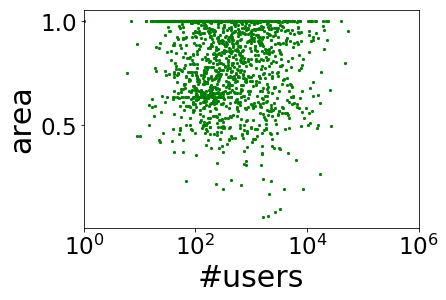

In [182]:
%matplotlib inline
def plot_users_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_ylabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xlabel('#users', fontsize=30)
    ax.set_xscale('log')
    #ax.set_ylim(0,100)
    ax.set_xlim(1,1000000)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_users_vs_area(X, Y, "../plots/plot_users_vs_area.svg")

5

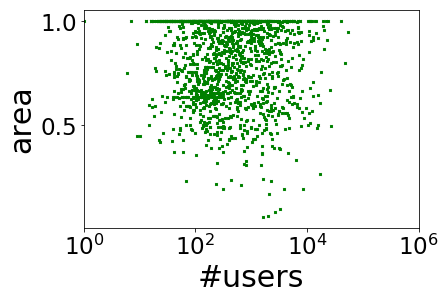

In [183]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_ylabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xlabel('#users', fontsize=30)
ax.set_xscale('log')
#ax.set_ylim(0,100)
ax.set_xlim(1,1000000)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Time_vs_Entropy'></a>
# Time vs Entropy

In [184]:
#Time vs. entropy per project

X,Y = Create_Array(times_per_proj, entropy_per_proj)

#Users vs. entropy: ratio and ID
ratios, IDs = Ratio(times_per_proj, entropy_per_proj, names)

In [185]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [186]:
#Correlation

np.corrcoef(X, Y)

array([[1.        , 0.14335446],
       [0.14335446, 1.        ]])

In [187]:
#Entropy/Time
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", time: ", tm, ", entropy/time: ", r, "\
        , \ndescription: ", desc, "\n")    

# 0 , project:  Seventeen , entropy:  0.6806294878916634 , time:  10.676111111111112 , entropy/time:  4.919179545105198e-15         , 
description:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 1 , project:  Tetris , entropy:  2.1516028645952874 , time:  39.6825 , entropy/time:  4.183676420389479e-15         , 
description:  Depicts all 7 tetris pieces 

# 2 , project:  TOPS , entropy:  1.0910839074486685 , time:  21.069166666666668 , entropy/time:  3.995818839802577e-15         , 
description:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 3 , project:  Tiny Flaggy Flag , entropy:  1.5344598931515927 , time:  31.919444444444444 , entropy/time:  3.709327814887962e-15         , 
description:  Flaggy Flag is the Rebel Flag of the Hell

In [188]:
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]/(1000 * 60 * 60)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    tm = times_per_proj[proj] / (1000 * 60 * 60)
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", time: ", tm, ", entropy/time: ", r, "\
        , \ndescription: ", desc, "\n")    

# 1 , project:  FRC team #4611 , entropy:  0.0 , time:  70.25222222222222 , entropy/time:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 2 , project:  PUBG , entropy:  0.03315839180969552 , time:  70.37055555555555 , entropy/time:  3.635779007785015e-17         , 
description:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds." Destroyed by the void in the final moments. 

# 3 , project:  Former location of the Bullet Kin , entropy:  0.043331176817649 , time:  71.28111111111112 , entropy/time:  4.690520320523787e-17         , 
description:  The location of

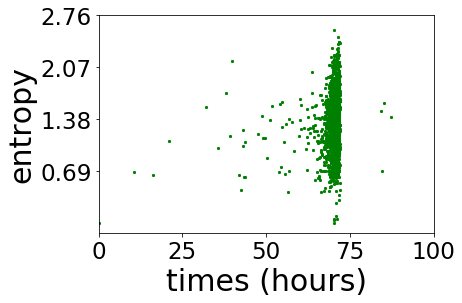

In [189]:
%matplotlib inline
X=X/(1000 * 60 * 60)
def plot_entropy_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_entropy_vs_times(X, Y, "../plots/plot_entropy_vs_times.svg")

5

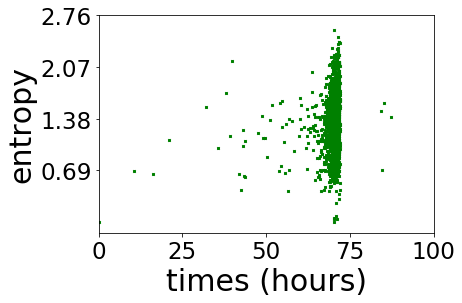

In [190]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('entropy', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Time_vs_Area'></a>
# Time vs Area

In [191]:
#Time vs. area per project

X,Y = Create_Array(times_per_proj, area_per_proj)

#Time vs. area: ratio and ID
ratios, IDs = Ratio(times_per_proj, area_per_proj, names)

In [192]:
print(times_per_proj['1980'])

0


In [193]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [194]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.       , -0.0275235],
       [-0.0275235,  1.       ]])

In [195]:
#Area/Time
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]*(1000*3600)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    t = times_per_proj[proj]/(1000*3600)
    
    print("#", i, ", project: ", name, ", time: ", t, ", area: ", ar, ", area/time: ", r, "\
        , \ndescription: ", desc, "\n")  

# 0 , project:  Seventeen , time:  10.676111111111112 , area:  0.76 , area/time:  0.07118696987042723         , 
description:  SEVENTEEN, or SVT, is a South Korean boy idol group that debuted in 2015 with Pledis Entertainment. Their members are divided into three sub-units. Their official fan club is known as Carat, with a jewel icon.  It is represented here in their fandom colors. 

# 1 , project:  Make Trade Fair , time:  16.12527777777778 , area:  1.0 , area/time:  0.06201443558250504         , 
description:  An organization supported by frontman Chris Martin of Coldplay drawn by the nearby Coldplay redditors. 

# 2 , project:  TOPS , time:  21.069166666666668 , area:  1.0 , area/time:  0.04746272198710596         , 
description:  A school program called TOPS, written in by 3-4 people, led by /u/Thunderbird2678. 

# 3 , project:  Tiny Flaggy Flag , time:  31.919444444444444 , area:  1.0 , area/time:  0.03132886606909755         , 
description:  Flaggy Flag is the Rebel Flag of the H

In [196]:
#Area/Time
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]*(1000*3600)
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj] 
    t = times_per_proj[proj]/(1000*3600)
    
    print("#", i, ", project: ", name, ", time: ", t, ", area: ", ar, ", area/time: ", r, "\
        , \ndescription: ", desc, "\n") 

# 1 , project:  The Dutch Border , time:  71.71055555555556 , area:  0.060002013490385586 , area/time:  0.0008367249845652201         , 
description:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. The first made steps of this plan, the orange colour and the border flag, still remains. 

# 2 , project:  /r/parahumans worm , time:  71.9486111111111 , area:  0.06153541749109616 , area/time:  0.0008552690113234607         , 
description:  It's a worm created by the subreddit /r/parahumans.
It doubles as a tail for "The Beast". Although it was developed independently initially, /r/Portugal suggested that its head popped up on their side, which was 

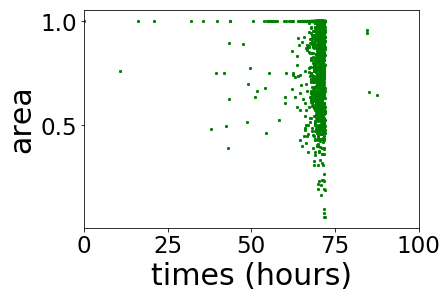

In [197]:
%matplotlib inline
X=X/(1000*3600)
def plot_area_vs_times(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('times (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('area', fontsize=30)
    #ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_area_vs_times(X, Y, "../plots/plot_area_vs_times.svg")

5

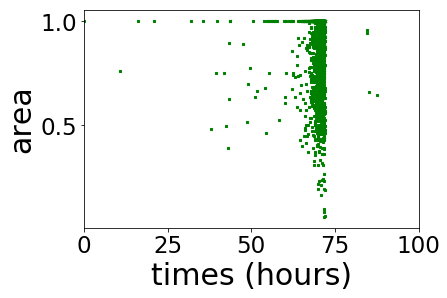

In [198]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('times (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('area', fontsize=30)
#ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Area_vs_Entropy'></a>
# Area vs Entropy

In [199]:
#Area vs. entropy per project

X,Y = Create_Array(area_per_proj, entropy_per_proj)

#Area vs. entropy: ratio and ID
ratios, IDs = Ratio(area_per_proj, entropy_per_proj, names)

In [200]:
sorted_ratios = sorted(ratios.items(), key=operator.itemgetter(1), reverse=True)

In [201]:
#Correlation

np.corrcoef(X, Y)

array([[ 1.        , -0.29813553],
       [-0.29813553,  1.        ]])

In [202]:
#Entropy/Area
#Top-10
for i in range(10):
    proj = sorted_ratios[i][0]
    r = sorted_ratios[i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj]
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", area: ", ar, ", entropy/area: ", r, "\
        , \ndescription: ", desc, "\n")

# 0 , project:  /r/parahumans worm , entropy:  1.6244986889937705 , area:  0.06153541749109616 , entropy/area:  26.39940956326211         , 
description:  It's a worm created by the subreddit /r/parahumans.
It doubles as a tail for "The Beast". Although it was developed independently initially, /r/Portugal suggested that its head popped up on their side, which was agreed upon. It also features a traditional Portuguese hat with national colors. 

# 1 , project:  The Dutch Border , entropy:  1.3364353042149768 , area:  0.060002013490385586 , entropy/area:  22.273174289878128         , 
description:  The dutch border flag was used by the Netherlands to indicate their territory. Some of the Dutch planned to overtake the triangular area in this corner, with the Unregistered HyperCam 2, Rainbow Road and the right edge as borders. However, after some discussion of the Dutch diplomats with the makers of Pharah this plan was cancelled and an agreement was made not to expand in their direction. 

In [203]:
#Entropy/Area
#Bottom-10
for i in range(1,11):
    proj = sorted_ratios[-i][0]
    r = sorted_ratios[-i][1]
    
    name = names[int(proj)]
    desc = descriptions[int(proj)]
    
    ar = area_per_proj[proj]
    ent = entropy_per_proj[proj]
    
    print("#", i, ", project: ", name, ", entropy: ", ent, ", area: ", ar, ", entropy/area: ", r, "\
        , \ndescription: ", desc, "\n")

# 1 , project:  The Red Dot , entropy:  0.0 , area:  1.0 , entropy/area:  0.0         , 
description:  A red dot originally placed by the host of the Hello Internet podcast CGP Grey. Even though many have tried to "fix it" they were unsuccessful.
 

# 2 , project:  FRC team #4611 , entropy:  0.0 , area:  1.0 , entropy/area:  0.0         , 
description:  As one of thousands of FRC (below) teams, 4611 was dedicated to representing themselves via a 4611 on the Poland Flag. 4611 met heavy resistance from both Poland and other FRC teams who didn't want to be outdone. By the end of the second day, 4611 had inspired many teams to rise up against Poland, only to be struck down in the early hours of day 3. Some say this act was the beginning of Poland's invasion of FRC. 

# 3 , project:  PUBG , entropy:  0.03315839180969552 , area:  0.9494949494949495 , entropy/area:  0.03492213605489209         , 
description:  A small tribute dedicated to the newly released game "PLAYERUNKNOWN's Battlegrounds

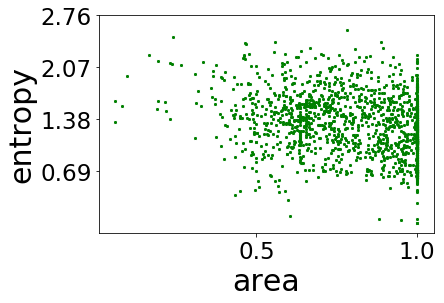

In [204]:
%matplotlib inline
def plot_entropy_vs_area(X, Y, output_file_name):
    plt.clf()

    ax = plt.subplot(111)
    ax.scatter(X, Y, color="green", marker='x', s=5)
    ax.set_xlabel('area', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_ylabel('entropy', fontsize=30)
    ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
    #ax.set_xlim(0,100)
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

plot_entropy_vs_area(X, Y, "../plots/plot_entropy_vs_area.svg")

5

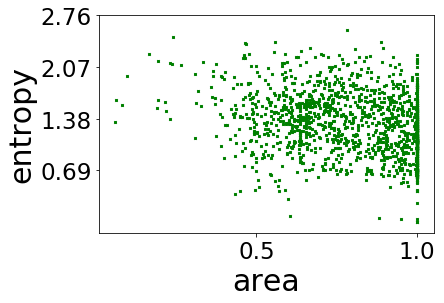

In [205]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

fig, ax = plt.subplots()
sc = ax.scatter(X, Y, color="green", marker='x', s=5)
ax.scatter(X, Y, color="green", marker='x', s=5)
ax.set_xlabel('area', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_ylabel('entropy', fontsize=30)
ax.set_yticks(np.arange(0.69,math.exp(1)+.1, .69))
#ax.set_xlim(0,100)
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind):
    pos = sc.get_offsets()[ind["ind"][0]]
    annot.xy = pos
    text = "{}".format("".join(IDs[ind["ind"]]))
    annot.set_text(text)
    
def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = sc.contains(event)
        if cont:
            update_annot(ind)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            if vis:
                annot.set_visible(False)
                fig.canvas.draw_idle()
    
fig.canvas.mpl_connect("motion_notify_event", hover)

<a id='Updates_per_time'></a>
# Updates per Time

In [4]:
#---already computed (first block)
tile_updates, total_tile_updates = update_category_per_project()
#use tile_updates and total_tile_updates

In [5]:
def generate_figures_time(hour_marks, picID):
    begin_time = 1490918688000
    
    if picID is None:
            data = extract_canvas_color('../data/sorted_tile_placements_proj.csv', 0, 1000, 0, 1000,\
                            begin_time+1000*60*60*hour_marks)
    else:
            data = extract_project_color('../data/sorted_tile_placements_proj.csv', picID, 
                            begin_time+1000*60*60*hour_marks)
    
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_17_"+str(t)+".png"
        draw_canvas(canvas_color_code_rgb(data[t]), tmp_file_name);

In [8]:
from canvas_vis import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

%matplotlib inline
def plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="#005d5d", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="#002d9c", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="#fa4d56", linewidth=3, label="Adv", linestyle=':')
       
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_17_"+str(t)+".png"
        arr_img = plt.imread(tmp_file_name, format='png')
        
        imagebox = OffsetImage(arr_img, zoom=zoom)
        imagebox.image.axes = ax
    
        ab = AnnotationBbox(imagebox, (hour_marks[t], up_line),
                        None,
                        xycoords='data',
                        pad=0.1)

        ax.add_artist(ab)
    
    ax.set_ylabel('update (%)', fontsize=15)
    ax.set_xlabel('time (hours)', fontsize=15)
    ax.tick_params(labelsize=10)
    ax.set_xlim(0, 110)

    ax.set_xticks(np.arange(0,95, 24))
    ax.set_ylim(0, 2)
    ax.set_yticks(np.arange(0,1.3, .4))
    
    ax.vlines(np.array(hour_marks),ymin=0,ymax=up_line,color='k', linestyle='--')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
          fancybox=True, shadow=True, ncol=3, fontsize=12)
    ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_aspect(aspect=.2)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 10000x10000 with 0 Axes>

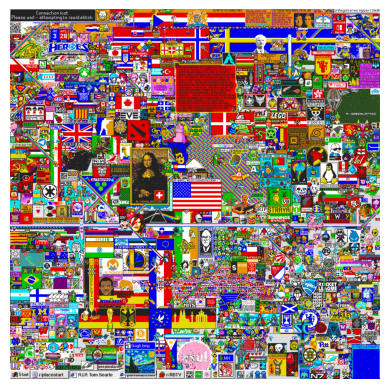

In [12]:
generate_figures_time(np.array([24, 48, 72, 96]), None)

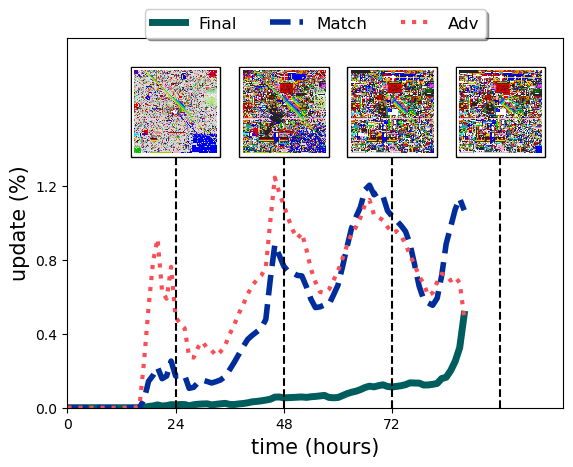

In [9]:
#zoom =.04 decides how large the figures should be

# plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
plot_updates_per_time_with_figure(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], None, np.array([24, 48, 72, 96]), 1.6, .04,
    "../plots/plot_updates_time_total_fig.svg")

In [211]:
%matplotlib inline
def plot_updates_per_time_all_types(pixel, pixel_color, other, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
        
    ax.set_ylabel('update (%)', fontsize=30)
    ax.set_xlabel('time (hours)', fontsize=30)
    ax.tick_params(labelsize=23)
    ax.set_xticks(np.arange(0,97, 24))
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

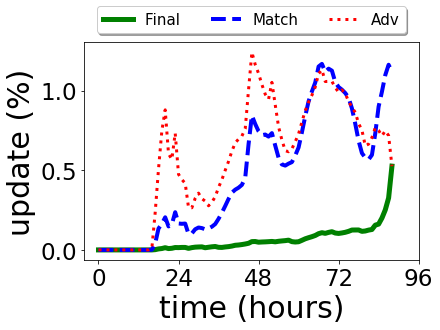

In [212]:
#total updates per time all types
plot_updates_per_time_all_types(total_tile_updates["final_updates"], total_tile_updates["agreeing_updates"],
    total_tile_updates["disagreeing_updates"], "../plots/plot_updates_time_total.svg")

5

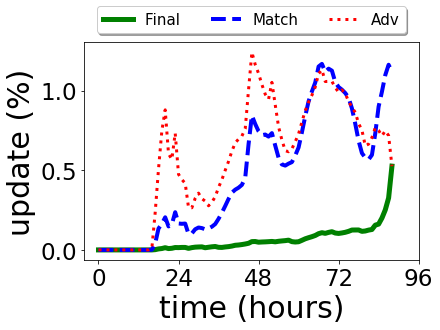

In [213]:
%matplotlib tk

cmap = plt.cm.RdYlGn
norm = plt.Normalize(1,4)

pixel = total_tile_updates["final_updates"]

pixel_color = total_tile_updates["agreeing_updates"]

other = total_tile_updates["disagreeing_updates"]

fig,ax = plt.subplots()
total = pixel+pixel_color+other
line1, = ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
line2, = ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
line3, = ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
        
ax.set_ylabel('update (%)', fontsize=30)
ax.set_xlabel('time (hours)', fontsize=30)
ax.tick_params(labelsize=23)
ax.set_xticks(np.arange(0,97, 24))
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
ax.ticklabel_format(useOffset=False, style='plain')
    
annot = ax.annotate("", xy=(0,0), xytext=(5,5),textcoords="offset points", size=14)
annot.set_visible(False)   

def update_annot(ind, line):
    x,y = line.get_data()
    annot.xy = (x[ind["ind"][0]], y[ind["ind"][0]])
    text = "{}, {}".format(str(annot.xy[0]), 
                           str(np.around(annot.xy[1], decimals=2)))
    annot.set_text(text)

def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        cont, ind = line1.contains(event)
        if cont:
            update_annot(ind, line1)
            annot.set_visible(True)
            fig.canvas.draw_idle()
        else:
            cont, ind = line2.contains(event)
            
            if cont:
                update_annot(ind, line2)
                annot.set_visible(True)
                fig.canvas.draw_idle()
            else:
                cont, ind = line3.contains(event)
            
                if cont:
                    update_annot(ind, line3)
                    annot.set_visible(True)
                    fig.canvas.draw_idle()
                else:
                    if vis:
                        annot.set_visible(False)
                    fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

## Example of some projects

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

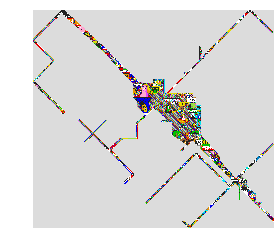

In [214]:
generate_figures_time(np.array([24, 48, 72, 96]), 286)

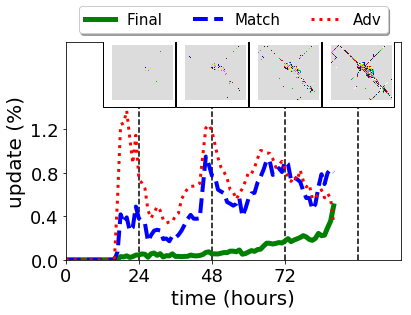

In [215]:
picID = 286

plot_updates_per_time_with_figure(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], picID, np.array([24, 48, 72, 96]), 1.7, 0.045, 
    "../plots/plot_updates_time_286_fig.svg")

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

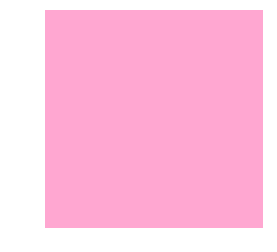

In [216]:
generate_figures_time(np.array([24, 48, 72, 96]), 1824)

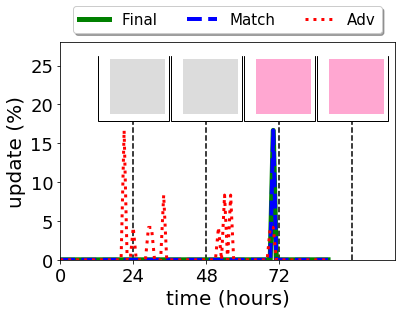

In [217]:
from canvas_vis import *
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.axes_divider import make_axes_area_auto_adjustable

%matplotlib inline
def plot_updates_per_time_with_figure(pixel, pixel_color, other, proj, hour_marks, up_line, zoom, output_file_name):
    plt.clf()
    ax = plt.subplot(111)
    total = pixel+pixel_color+other
    ax.plot(np.arange(pixel.shape[0]), 100*pixel, color="green", linewidth=5, label="Final", linestyle='-')
    ax.plot(np.arange(pixel_color.shape[0]), 100*pixel_color, color="blue", linewidth=4, label="Match", linestyle='--')
    ax.plot(np.arange(other.shape[0]), 100*other, color="red", linewidth=3, label="Adv", linestyle=':')
       
    for t in range(len(hour_marks)):
        tmp_file_name = "../plots/tmp_fig_"+str(t)+".png"
        arr_img = plt.imread(tmp_file_name, format='png')
        
        imagebox = OffsetImage(arr_img, zoom=zoom)
        imagebox.image.axes = ax
    
        ab = AnnotationBbox(imagebox, (hour_marks[t], up_line),
                        None,
                        xycoords='data',
                        pad=0.1)

        ax.add_artist(ab)
    
    ax.set_ylabel('update (%)', fontsize=20)
    ax.set_xlabel('time (hours)', fontsize=20)
    ax.tick_params(labelsize=18)
    ax.set_xlim(0, 110)

    ax.set_xticks(np.arange(0,95, 24))
    ax.set_ylim(0, 28)
    #ax.set_yticks(np.arange(0,1.3, .4))
    
    ax.vlines(np.array(hour_marks),ymin=0,ymax=up_line,color='k', linestyle='--')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),
          fancybox=True, shadow=True, ncol=3, fontsize=15)
    ax.ticklabel_format(useOffset=False, style='plain')
    #ax.set_aspect(aspect=.2)
    
    plt.savefig(output_file_name, dpi=300, bbox_inches='tight')

picID = 1824

plot_updates_per_time_with_figure(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], picID, np.array([24, 48, 72, 96]), 22., 0.045, 
    "../plots/plot_updates_time_1824_fig.svg")

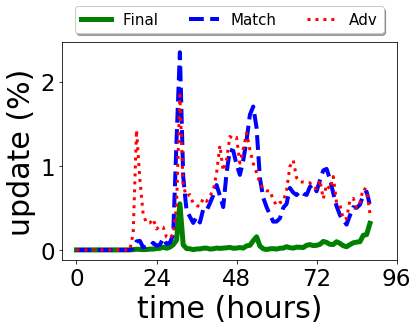

In [218]:
picID = 179
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_179.svg")

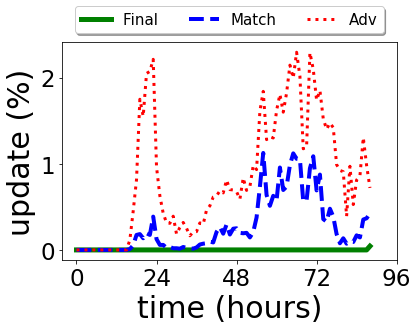

In [219]:
picID = 1493
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_1493.svg")

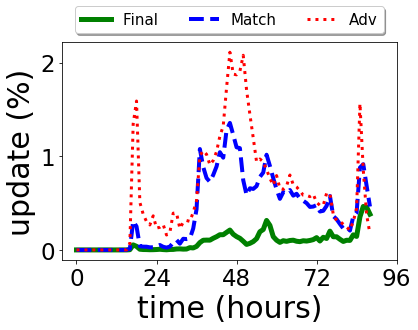

In [220]:
picID = 2
plot_updates_per_time_all_types(tile_updates[picID]["final_updates"], tile_updates[picID]["agreeing_updates"],
    tile_updates[picID]["disagreeing_updates"], "../plots/plot_updates_time_2.svg")

<a id='#User_community'></a>
# User Community

In [6]:
from sklearn.cluster.bicluster import SpectralCoclustering

user_proj_matrix_pixel, users_dict, proj_dict = user_project_matrix_pixel(input_file_proj, projects_to_remove)

users_per_proj_list = users_per_project_list(input_file_proj, projects_to_remove)

In [8]:
# Create a reverse of proj_dict where the keys are the indexes into user_proj_matrix_pixel and the values are
# the project ids
proj_dict_reverse = dict()
for proj_id in proj_dict:
    proj_dict_reverse[ proj_dict[proj_id] ] = proj_id

In [12]:
def compute_edge_weight(val1, val2):
    # Given two values, val1 and val2, where each value represents the number of updates that a single user's 
    # contributed to two different projects, compute the weight of the edge
    return (val1 * val2) / (val1 + val2)

In [14]:
def draw_graph(G, names = dict()):
    '''
        Draw the graph g.
        All edges with a weight < weight_threshold will be colored red and be dashed
        All edges with a weight >= weight_threshold will be colored black and be solid
    '''
    weight_threshold = 0.02
    pos = nx.fruchterman_reingold_layout(G)
#     pos = nx.kamada_kawai_layout(G)
#     pos = nx.spring_layout(G,scale=2)


    nx.draw_networkx_nodes(G,pos,node_color='green',node_size=20)
    lower_weight_edges = list()
    higher_weight_edges = list()
    
    for (node1,node2,data) in G.edges(data=True):
        if data['weight'] < weight_threshold:
            lower_weight_edges.append( (node1, node2) ) 
        else:
            higher_weight_edges.append( (node1, node2) )
    
    # Plot the edges
    nx.draw_networkx_edges(G, pos, width=2, edgelist=lower_weight_edges, edge_color='red', style='dashed')
#     nx.draw_networkx_edges(G, pos, width=2, edgelist=higher_weight_edges, edge_color='black', style='solid')
    nx.draw_networkx_labels(G, pos = pos, labels = names, font_size = 3)

    plt.axis('off')
    plt.figure(None,figsize=(20,20)) 
    plt.savefig("project_relationships_graph.png", bbox_inches='tight', pad_inches=0) 
    plt.show() 

Try to create a complete graph between nodes.
Each node is a project.
Each edge represents the shared users between projects.

In [222]:
def generate_graph(user_proj_matrix_pixel, threshold):    
    W = np.zeros((user_proj_matrix_pixel.shape[1], user_proj_matrix_pixel.shape[1]))
    
    for u in range(user_proj_matrix_pixel.shape[0]):
        for p1 in user_proj_matrix_pixel.rows[u]:
            for p2 in user_proj_matrix_pixel.rows[u]:
                if p1 < p2:
                    W[p1,p2] +=1
                elif p1 > p2:
                    W[p2,p1] +=1
    
    g = nx.Graph()
    
    for proj in proj_dict_reverse:
        g.add_node(proj)
    
    for p1 in range(user_proj_matrix_pixel.shape[1]):
        for p2 in range(user_proj_matrix_pixel.shape[1]):
            if p1 < p2 and W[p1,p2] > 0:
                p1_id = proj_dict_reverse[p1]
                p2_id = proj_dict_reverse[p2]
                
                if W[p1,p2] > threshold:
                    g.add_edge(p1_id,p2_id, weight=W[p1,p2])
                    
    gccs = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)
        
    return gccs[0]

In [44]:
def generate_graph(proj_dict, user_proj_matrix_pixel):
    g = nx.Graph()

    for proj in proj_dict:
        g.add_node(proj)

    user_proj_matrix_nonzeros = user_proj_matrix_pixel.nonzero()
    nonzero_indexes = list()
    
    for i in range( max(user_proj_matrix_nonzeros[0]) + 1 ):
        nonzero_indexes.append( list() )

    for i in range( len(user_proj_matrix_nonzeros[0]) ):
        nonzero_indexes[user_proj_matrix_nonzeros[0][i]].append( user_proj_matrix_nonzeros[1][i] )

    for z in range(len(nonzero_indexes)):
        if len(nonzero_indexes[z]) > 0:
            for i in range(len(nonzero_indexes[z])):
                for j in range(i + 1, len(nonzero_indexes[z]) ):

                    val1 = user_proj_matrix_pixel[z, nonzero_indexes[z][i]]
                    val2 = user_proj_matrix_pixel[z, nonzero_indexes[z][j]]
                    weight = compute_edge_weight(val1, val2)
                    if weight > 0:

                        proj_id1 = proj_dict_reverse[nonzero_indexes[z][i]]
                        proj_id2 = proj_dict_reverse[nonzero_indexes[z][j]]
                        if proj_id1 in proj_dict and proj_id2 in proj_dict:

                            if g.has_edge(proj_id1, proj_id2):
                                g[proj_id1][proj_id2]['weight'] += weight
                            else:
                                g.add_edge(proj_id1, proj_id2, weight = weight)
    return g

In [15]:
def analyze_project_to_project_weights(g):
    # Print out the max, min, median, mean and standard deviation of all the edge weights of the graph g
    all_weights = list()
    avg = 0

    for (node1,node2,data) in g.edges(data=True):
        all_weights.append(data['weight'])
        avg += data['weight']


    max_weight = max(all_weights)
    min_weight = min(all_weights)
    avg = avg / len(all_weights)
    med = statistics.median(all_weights)
    std_dev = statistics.stdev(all_weights)
    print("MAX:", max_weight)
    print("MIN:",min_weight)
    print("AVG:",avg)
    print("MED:", med)
    print("STD_DEV:", std_dev)
    
analyze_project_to_project_weights(g)

MAX: 2049.9491341393664
MIN: 0.5
AVG: 3.704016681992183
MED: 0.8
STD_DEV: 24.448369017063907


In [140]:
print(W[0])

[ 0.  0.  2. ...,  0.  0.  0.]


In [215]:
# Normalize edge weights
g = generate_graph(user_proj_matrix_pixel)
#normalized_g = nx.Graph()
#for (node1,node2,data) in g.edges(data=True):
#    new_weight = data['weight'] / np.sqrt( g.degree(node1, weight = 'weight') * g.degree(node2, weight = 'weight') )
#    normalized_g.add_edge(node1, node2, weight = new_weight)

In [68]:
# Remove all edges under unnormalized threshold
# This doesnt work for some reason. 
# Copy-paste to use
def remove_edges(g, threshold = 0.001, print_data = True):

    edges_to_remove = list()

    for (node1,node2,data) in g.edges(data=True):
        if data['weight'] <= threshold:
            edges_to_remove.append((node1, node2))

    for (node1, node2) in edges_to_remove:
        g.remove_edge(node1, node2)

    if print_data:
        print(len(edges_to_remove), "edges removed")
        print(len(g.edges),"edges remaining")
        analyze_project_to_project_weights(g)

In [35]:
# Check now whether there are any projects with no edges
# This would mean all of the edge weights must've been under threshold
nodes_to_remove = list(nx.isolates(g))
g.remove_nodes_from(nodes_to_remove)
print(len(nodes_to_remove),"nodes removed")
print(len(g.nodes()),"nodes remaining")

2 nodes removed
1473 nodes remaining


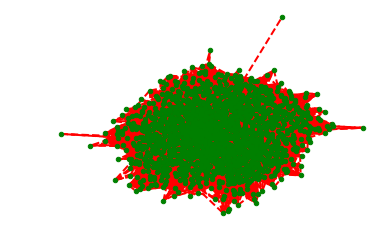

In [62]:
# nx.write_gexf(g, "test_graph.gexf")
draw_graph(normalized_g)

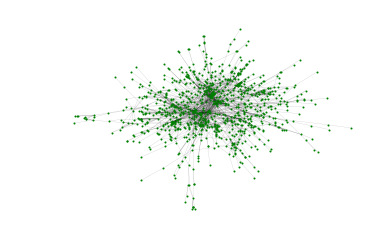

In [229]:
g = generate_graph(user_proj_matrix_pixel, 25)
pos = nx.fruchterman_reingold_layout(g)

#names_str = {}
#for v in g.nodes():
#    if updates_per_proj[v] > 250000:
#        names_str[v] = names[int(v)]
#    else:
#        names_str[v] = ""

nx.draw_networkx_nodes(g,pos,node_color='green',node_size=1, alpha=1.)
nx.draw_networkx_edges(g, pos, width=.2, edge_color='black', style='solid', alpha=0.3)
#nx.draw_networkx_labels(g,pos=pos,labels=names_str,font_size=10)
limits=plt.axis('off')
plt.savefig("project_relationships_graph.png", bbox_inches='tight', pad_inches=0, dpi=1000) 
plt.show() 

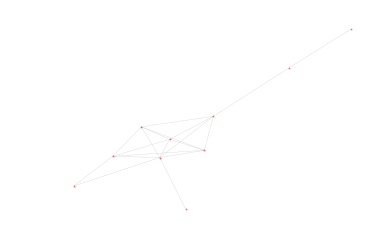

In [219]:
g = gs[1]

pos = nx.fruchterman_reingold_layout(g)

names_str = {}
for v in g.nodes():
    if updates_per_proj[v] > 200000:
        names_str[v] = names[int(v)]
    else:
        names_str[v] = ""

nx.draw_networkx_nodes(g,pos,node_color='red',node_size=1, alpha=0.4)
nx.draw_networkx_edges(g, pos, width=.2, edge_color='black', style='solid', alpha=0.3)
nx.draw_networkx_labels(g,pos=pos,labels=names_str,font_size=5)
limits=plt.axis('off')
plt.savefig("project_relationships_graph_2.png", bbox_inches='tight', pad_inches=0, dpi=1000) 
plt.show() 

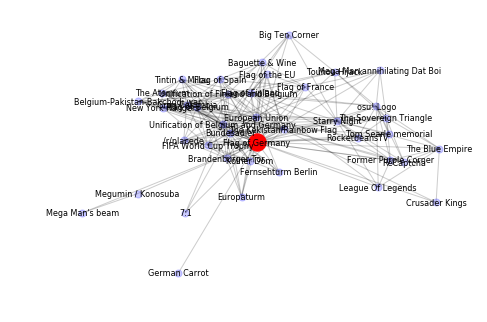

In [259]:
g = generate_graph(user_proj_matrix_pixel, 30)
  
pic_id = "20"
hub_ego = nx.ego_graph(g, pic_id)

names_str = {}
for v in hub_ego.nodes():
    names_str[str(v)] = names[int(v)]

pos = nx.spring_layout(hub_ego)
nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False, alpha=0.2)
nx.draw_networkx_labels(hub_ego,pos=pos,labels=names_str,font_size=8)
nx.draw_networkx_nodes(hub_ego, pos, nodelist=[pic_id], node_size=300, node_color='r')
plt.savefig("project_relationships_ego_german_flag.png", pad_inches=0, dpi=800) 
plt.show()

In [239]:
names_str["1501"]

'Romanian Heart 4'

In [175]:
g.number_of_nodes()

644

In [65]:
# analyze_project_to_project_weights(normalized_g)
remove_edges(normalized_g, threshold = 0.01)


0 edges removed
8758 edges remaining
MAX: 0.7596285824086731
MIN: 0.01000021881632489
AVG: 0.04359539010685722
MED: 0.022218910455645613
STD_DEV: 0.059675983134552295


In [40]:
def draw_ego_graph(pic_id, g):
    print(locations[pic_id].get_name())
    # print(g["1164"])
    hub_ego = nx.ego_graph(g, pic_id)
    pos = nx.spring_layout(hub_ego)
    nx.draw(hub_ego, pos, node_color='b', node_size=50, with_labels=False)
    # Draw ego as large and red
    nx.draw_networkx_nodes(hub_ego, pos, nodelist=[pic_id], node_size=300, node_color='r')
    plt.show()
    
    for (node1,node2,data) in hub_ego.edges(data=True):
        if node1 == pic_id or node2 == pic_id:
            print("(" + locations[str(node1)].get_name()+","+locations[str(node2)].get_name()+"):".ljust(40), str(data['weight']).ljust(10))


Flag of India


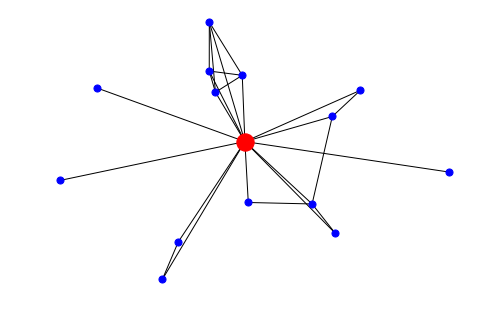

(Livecounting,Flag of India):                                       0.03331484042809937
(New York Rangers,Flag of India):                                       0.076485752179745
(Manchester United Crest,Flag of India):                                       0.012890244769977932
(Indian Flag Heart,Flag of India):                                       0.06755945953926669
(Flag of India,Homestuck):                                       0.059701778933484204
(Flag of India,Tiny Rick):                                       0.020011180356081352
(Flag of India,MOBIUS):                                       0.0119899628715678
(Flag of India,Belgium-Pakistan-Bakchodi war):                                       0.07392003218253719
(Flag of India,The Great Kansas Massacre):                                       0.07018143128358811
(Flag of India,Cool and New Webcomic):                                       0.022310118198242416
(Flag of India,Flag of Armenia):                                       0

In [41]:
draw_ego_graph("41", normalized_g)

In [78]:
sorted_up_proj = sorted(updates_per_proj.items(), key=operator.itemgetter(1), reverse=True)
top_up_proj = sorted_up_proj[:200]
top_proj_dict = dict()
top_proj_names = dict()
for (proj_id, updates) in top_up_proj:
    top_proj_dict[proj_id] = updates
    top_proj_names[proj_id] = locations[proj_id].get_name()
    

top_g = generate_graph(top_proj_dict, user_proj_matrix_pixel)



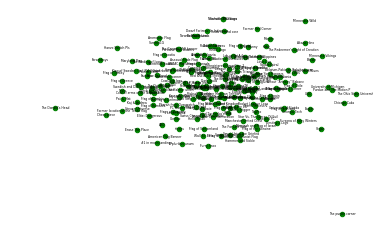

<Figure size 1440x1440 with 0 Axes>

In [86]:
draw_graph(top_g, top_proj_names)

Try to use biclustering to group together projects and users

In [222]:
n_clusters = 100

cocluster = SpectralCoclustering(n_clusters=n_clusters,
                                 svd_method='arpack', random_state=0)

cocluster.fit(user_proj_matrix_pixel)
y_cocluster = cocluster.row_labels_ # Users

x_cocluster = cocluster.column_labels_  # Projects

In [223]:
for project in proj_dict:
    print(project, locations[project].get_name(), " in cluster ",x_cocluster[ proj_dict[project] ])

230 Nine Inch Nails  in cluster  87
1031 University of Colorado Boulder  in cluster  0
118 In the Aeroplane Over the Sea  in cluster  95
748 Totoro  in cluster  63
206 R.I.P. Steve Irwin  in cluster  39
1038 Rainbow Grid  in cluster  63
1030 University of Pennsylvania  in cluster  91
212 AniList  in cluster  50
440 Android Gaming  in cluster  63
283 Poké balls  in cluster  76
83 DotA 2  in cluster  26
437 Professor Layton  in cluster  63
378 Nintendo Switch  in cluster  33
474 Urho Kekkonen  in cluster  63
398 Link  in cluster  87
380 Skeletor  in cluster  96
154 Radiohead  in cluster  87
115 Portland Trail Blazers  in cluster  95
145 Parahumans  in cluster  61
1618 /r/parahumans worm  in cluster  95
1329 Free Tyler1  in cluster  37
572 Bisexual pride flag  in cluster  61
179 He-Man  in cluster  80
382 AvoArmy  in cluster  61
1187 Vermont  in cluster  31
2024 Tatlin's Tower  in cluster  87
426 Wally  in cluster  73
41 Flag of India  in cluster  32
1058 The Alien  in cluster  63
394 The

1795 Remnants of a deflected beam  in cluster  62
698 Time Gear  in cluster  63
1292 Science icons from Factorio  in cluster  62
127 C-Shadow Memorial  in cluster  87
1425 sPWN  in cluster  32
1300 Dragon Radar & Four-Star Ball  in cluster  61
1441 Juke Juice power-up  in cluster  87
1948 Local Area Network  in cluster  63
524 NPR  in cluster  76
211 Buffalo, NY  in cluster  79
726 Arqade Logo  in cluster  63
1568 St. Louis Skyline  in cluster  77
1199 Philippines-Iceland-Faroe Islands Heart  in cluster  0
545 Piplup (Pokemon)  in cluster  37
1022 Ghost Bird  in cluster  63
1717 Quebec Heart  in cluster  51
550 Asexual Flag  in cluster  63
198 FIRST  in cluster  61
1525 Flag of Malaysia (attempted)  in cluster  76
31 Bitcoin  in cluster  94
330 Flag of Uruguay  in cluster  32
795 HUEBR  in cluster  63
1537 Coldplay: X&Y  in cluster  95
232 Megumin / Konosuba  in cluster  94
1841 Kuwait Flag  in cluster  61
226 Toronto Maple Leafs  in cluster  67
1138 Flag of Iran  in cluster  87
1560 R

1342 Ruby  in cluster  76
111 Noel smiley  in cluster  62
301 SquareSpiral  in cluster  63
492 Detroit Red Wings  in cluster  51
1044 Sideways Red Square  in cluster  61
1680 Alec/Regent  in cluster  61
851 Flag of Northwest Territories  in cluster  15
705 Native American medicine wheel  in cluster  15
1343 Sapphire  in cluster  76
916 Green Bay Packers  in cluster  39
259 Flag of the Métis Peoples  in cluster  15
1203 Apollo Justice  in cluster  27
1365 Northwestern University   in cluster  50
241 Rickroll QR code  in cluster  39
1190 r/BDSM  in cluster  94
1800 Flag of Gibraltar  in cluster  73
1813 Pixel Poop  in cluster  85
334 Flag of Manitoba  in cluster  15
313 Realm of the Mad God  in cluster  80
1254 Muse Black Holes & Revelations Cover  in cluster  87
1748 Clarkson Open Source Institute  in cluster  95
1181 Nashville Predators  in cluster  43
1287 Portuguese Sardine  in cluster  91
1243 Dutch Heart  in cluster  0
976 Akane Hino  in cluster  87
389 Virginia Tech  in cluster  6

In [224]:
# Group all projects in the same cluster together in a dictionary
# Key is cluster number
# Value is list of projects
proj_clusters = dict()
for project in proj_dict:
    if proj_clusters.get( x_cocluster[ proj_dict[project] ] ) == None:
        proj_clusters[ x_cocluster[ proj_dict[project] ] ] = list()
    
    proj_clusters[ x_cocluster[ proj_dict[project] ] ].append( project + "|" + locations[project].get_name() )

In [225]:
# Group all users in the same cluster together in a dictionary
# Key is cluster number
# Value is list of users
user_clusters = dict()
for user in users_dict:
    if user_clusters.get( y_cocluster[ users_dict[user] ] ) == None:
        user_clusters[ y_cocluster[ users_dict[user] ] ] = set()
        
    user_clusters[ y_cocluster[ users_dict[user] ] ].add( user )

In [226]:
# Get all the clusters that only contain users and no projects
clusters_with_only_users = set(user_clusters.keys()) - set( proj_clusters.keys() )
print(len(clusters_with_only_users), "clusters with no projects")

# Get all the clusters that only contain projects and no users
clusters_with_only_projects =  set( proj_clusters.keys() ) - set(user_clusters.keys())
print(len(clusters_with_only_projects), "clusters with no users")


35 clusters with no projects
3 clusters with no users


In [227]:
def print_k_clustsers(proj_clusters, user_clusters, k = 10, top = True):
    '''
        Print the k clusters and all projets in each cluster
        If top is true, print in order of largest cluster to smallest cluster
        If top is false, print in order of smallest cluster to largest cluster
        If k >= number of clusters, then print out every cluster.
        Also print the number of users in the same cluster
    '''
    if k >= len(proj_clusters):
        k = len(proj_clusters)
    sorted_by_longest_clusters = sorted([(len(v), k) for k, v in proj_clusters.items()], reverse = top)
    
    for i in range(k):
        cluster_size, cluster_num = sorted_by_longest_clusters[i]
        ratios_list = list()
        print("Cluster:",cluster_num, ", Size:", cluster_size)
        if user_clusters.get(cluster_num) != None:
            print("Number users:", len(user_clusters[cluster_num]))
        else:
            print("Number users: 0")
        for project in proj_clusters[cluster_num]:
            print("\t",project)
            proj_id, proj_name = project.split("|")
            
            if user_clusters.get(cluster_num) != None:
                total_user_updates = 0
                cluster_user_updates = 0
                for user in users_per_proj_list[proj_id]:
                    total_user_updates += users_per_proj_list[proj_id][user]
                    if user in user_clusters[cluster_num]:
                        cluster_user_updates += users_per_proj_list[proj_id][user]
                
                
                user_ratio = cluster_user_updates / total_user_updates
                ratios_list.append(user_ratio)
                print("\tProject updates in cluster/Total updates in proj:", str(cluster_user_updates) + "/" + str(total_user_updates), user_ratio  )
            else:
                print("\tNo users in this cluster" )
        if len(ratios_list) > 0:
            print("Average Ratio:", sum(ratios_list) / len(ratios_list) )
        else:
            print("No users in cluster")
        if len(ratios_list) > 1:
            print("Std Dev:", statistics.stdev(ratios_list) )
        else:
            print("No std dev")
        print()
            

In [228]:
print_k_clustsers(proj_clusters, user_clusters, 100, top = True)

Cluster: 63 , Size: 199
Number users: 29590
	 748|Totoro
	Project updates in cluster/Total updates in proj: 202/224 0.9017857142857143
	 1038|Rainbow Grid
	Project updates in cluster/Total updates in proj: 1686/2793 0.6036519871106337
	 440|Android Gaming
	Project updates in cluster/Total updates in proj: 2104/3531 0.5958651939960351
	 437|Professor Layton
	Project updates in cluster/Total updates in proj: 786/1283 0.612626656274357
	 474|Urho Kekkonen
	Project updates in cluster/Total updates in proj: 13980/22932 0.6096284667713239
	 1058|The Alien
	Project updates in cluster/Total updates in proj: 165/229 0.7205240174672489
	 616|THE_PACK
	Project updates in cluster/Total updates in proj: 2592/3839 0.6751758270382913
	 1473|Romanian Heart 2
	Project updates in cluster/Total updates in proj: 330/627 0.5263157894736842
	 461|Tamadra
	Project updates in cluster/Total updates in proj: 2131/4644 0.45887166236003446
	 456|Dwarf Fortress
	Project updates in cluster/Total updates in proj: 24

	Project updates in cluster/Total updates in proj: 1315/2173 0.6051541647491947
	 1721|Demo
	Project updates in cluster/Total updates in proj: 945/1939 0.48736462093862815
	 1050|American Flag Banner
	Project updates in cluster/Total updates in proj: 6095/20125 0.3028571428571429
	 594|Overwatch logo and Torbjörn
	Project updates in cluster/Total updates in proj: 1956/3763 0.5197980334839224
	 600|German Carrot
	Project updates in cluster/Total updates in proj: 137/192 0.7135416666666666
	 499|Asriel Dreemurr
	Project updates in cluster/Total updates in proj: 434/1253 0.3463687150837989
	 1288|r/wine
	Project updates in cluster/Total updates in proj: 256/487 0.5256673511293635
	 1816|Oklahoma State University
	Project updates in cluster/Total updates in proj: 66/118 0.559322033898305
	 290|Kölner Dom
	Project updates in cluster/Total updates in proj: 2025/3200 0.6328125
	 1922|Lugarix
	Project updates in cluster/Total updates in proj: 50/134 0.373134328358209
	 1718|BBB
	Project update

	Project updates in cluster/Total updates in proj: 4110/21461 0.191510181259028
	 272|Formula 1
	Project updates in cluster/Total updates in proj: 2682/6354 0.42209631728045327
	 110|Crusader Kings
	Project updates in cluster/Total updates in proj: 26722/51961 0.5142703181232078
	 397|Flag of the EU
	Project updates in cluster/Total updates in proj: 9959/43441 0.22925347022398196
	 4|The Void Prism
	Project updates in cluster/Total updates in proj: 8381/36519 0.22949697417782525
	 340|OwO
	Project updates in cluster/Total updates in proj: 357/976 0.36577868852459017
	 17|Factorio
	Project updates in cluster/Total updates in proj: 5770/10355 0.5572187349106712
	 1536|Blocker Lemming
	Project updates in cluster/Total updates in proj: 99/257 0.3852140077821012
	 199|Helix Fossil
	Project updates in cluster/Total updates in proj: 7955/28274 0.2813538940369244
	 335|Star Trek
	Project updates in cluster/Total updates in proj: 2516/3594 0.7000556483027268
	 1488|French hearts
	Project update

	Project updates in cluster/Total updates in proj: 4490/10986 0.4087019843437102
	 1438|Rolling Bomb power-up
	Project updates in cluster/Total updates in proj: 512/638 0.8025078369905956
	 557|Porter Robinson - Worlds
	Project updates in cluster/Total updates in proj: 4555/7455 0.6109993293091884
	 1543|Red and Black checkers
	Project updates in cluster/Total updates in proj: 26631/35379 0.7527346731111676
	 673|OpTic Gaming / Time 2 Pound
	Project updates in cluster/Total updates in proj: 2178/2729 0.7980945401245878
	 716|Sakura Gakuin
	Project updates in cluster/Total updates in proj: 2864/3092 0.926261319534282
	 128|BABYMETAL
	Project updates in cluster/Total updates in proj: 22332/30206 0.7393233132490233
	 1844|Unfinished Shoop-da-Whoop
	Project updates in cluster/Total updates in proj: 78/150 0.52
	 477|Anaheim Ducks
	Project updates in cluster/Total updates in proj: 633/847 0.7473435655253837
	 1647|Heart of Italy
	Project updates in cluster/Total updates in proj: 134/517 0.2

	Project updates in cluster/Total updates in proj: 3536/17903 0.1975087974082556
	 1109|Philippine heart
	Project updates in cluster/Total updates in proj: 75/521 0.14395393474088292
	 1199|Philippines-Iceland-Faroe Islands Heart
	Project updates in cluster/Total updates in proj: 116/1762 0.06583427922814983
	 1101|French-Irish heart
	Project updates in cluster/Total updates in proj: 445/1125 0.39555555555555555
	 1435|Totoro
	Project updates in cluster/Total updates in proj: 534/695 0.7683453237410072
	 70|Niko and Puzzle
	Project updates in cluster/Total updates in proj: 1661/2281 0.7281893906181499
	 1385|Dominican Republic heart
	Project updates in cluster/Total updates in proj: 133/309 0.43042071197411
	 1574|Pinochet/Hoppean Snek
	Project updates in cluster/Total updates in proj: 1764/2765 0.6379746835443038
	 1442|Greek heart
	Project updates in cluster/Total updates in proj: 177/617 0.28687196110210694
	 917|Flag of Colorado
	Project updates in cluster/Total updates in proj: 18

	Project updates in cluster/Total updates in proj: 24374/64665 0.3769272403927936
	 239|Homestuck
	Project updates in cluster/Total updates in proj: 4514/9004 0.5013327410039983
	 359|The Beast
	Project updates in cluster/Total updates in proj: 2730/5100 0.5352941176470588
	 371|Flag of Iceland
	Project updates in cluster/Total updates in proj: 3185/11010 0.28928247048138056
	 1248|Iceland Banner
	Project updates in cluster/Total updates in proj: 1635/6307 0.25923576977960994
	 65|Flag of Croatia
	Project updates in cluster/Total updates in proj: 7829/10778 0.7263870848023752
	 5|Arch Linux
	Project updates in cluster/Total updates in proj: 8555/13844 0.6179572377925455
	 727|Coldplay: Parachutes
	Project updates in cluster/Total updates in proj: 424/473 0.8964059196617337
	 80|Mugiwara Flag
	Project updates in cluster/Total updates in proj: 18346/42200 0.434739336492891
	 99|The Numbers from Lost
	Project updates in cluster/Total updates in proj: 902/2022 0.44609297725024727
	 1549|Re

	Project updates in cluster/Total updates in proj: 2795/8670 0.3223760092272203
	 1190|r/BDSM
	Project updates in cluster/Total updates in proj: 198/620 0.3193548387096774
	 847|I.O.I
	Project updates in cluster/Total updates in proj: 33/169 0.1952662721893491
	 1422|Bretagne <3 Riley Furson
	Project updates in cluster/Total updates in proj: 97/218 0.44495412844036697
	 850|BIGBANG
	Project updates in cluster/Total updates in proj: 36/45 0.8
Average Ratio: 0.5676483515840164
Std Dev: 0.2080522604735253

Cluster: 85 , Size: 55
Number users: 9766
	 1293|Martian Navy Flag
	Project updates in cluster/Total updates in proj: 2802/3770 0.743236074270557
	 255|Kaj & Andrea
	Project updates in cluster/Total updates in proj: 4857/7384 0.6577735644637053
	 281|The flag of Denmark
	Project updates in cluster/Total updates in proj: 29005/59509 0.48740526643028786
	 1831|Bunnings Snags
	Project updates in cluster/Total updates in proj: 2983/8407 0.35482336148447724
	 214|Rocket League
	Project updat

	Project updates in cluster/Total updates in proj: 6370/11016 0.5782498184458968
	 1338|The Great Diamond Authority
	Project updates in cluster/Total updates in proj: 2337/4336 0.5389760147601476
	 256|Majora's Mask
	Project updates in cluster/Total updates in proj: 2807/5124 0.5478142076502732
	 282|Star Vs. The Forces Of Evil
	Project updates in cluster/Total updates in proj: 6609/8784 0.7523907103825137
	 1173|Russian heart
	Project updates in cluster/Total updates in proj: 665/1764 0.376984126984127
	 524|NPR
	Project updates in cluster/Total updates in proj: 1181/6564 0.1799207800121877
	 1525|Flag of Malaysia (attempted)
	Project updates in cluster/Total updates in proj: 48/463 0.10367170626349892
	 1971|Letter N
	Project updates in cluster/Total updates in proj: 50/106 0.4716981132075472
	 1339|Peridot
	Project updates in cluster/Total updates in proj: 1251/2371 0.5276254744833404
	 1535|Indonesian/Singaporean/Dutch Heart
	Project updates in cluster/Total updates in proj: 104/10

	Project updates in cluster/Total updates in proj: 3058/7425 0.41185185185185186
	 1197|Broke Phi Broke
	Project updates in cluster/Total updates in proj: 515/789 0.6527249683143219
	 1946|Sovet Union the Griefed
	Project updates in cluster/Total updates in proj: 48450/107334 0.45139471183408797
	 667|Foliat
	Project updates in cluster/Total updates in proj: 421/457 0.9212253829321663
	 69|Anarcho-Communist Flag
	Project updates in cluster/Total updates in proj: 13057/23713 0.5506262387719816
	 390|Hammer and Sickle
	Project updates in cluster/Total updates in proj: 42597/95670 0.44524929444967076
	 14|Flag of the Ukraine
	Project updates in cluster/Total updates in proj: 7924/13949 0.5680693956556025
	 322|Buffalo Sabres
	Project updates in cluster/Total updates in proj: 579/736 0.7866847826086957
	 658|Livecounting
	Project updates in cluster/Total updates in proj: 1452/2084 0.6967370441458733
	 697|ACAB/Antifa
	Project updates in cluster/Total updates in proj: 567/807 0.702602230483

	Project updates in cluster/Total updates in proj: 36480/108764 0.3354050972748336
	 332|Flag of Ontario
	Project updates in cluster/Total updates in proj: 505/967 0.5222337125129266
	 755|Flag of Nunavut
	Project updates in cluster/Total updates in proj: 316/589 0.5365025466893039
	 644|Flag of Newfoundland and Labrador
	Project updates in cluster/Total updates in proj: 654/1040 0.6288461538461538
	 1323|Flag of Prince Edward Island
	Project updates in cluster/Total updates in proj: 396/744 0.532258064516129
	 840|1867 • 2017
	Project updates in cluster/Total updates in proj: 654/1215 0.5382716049382716
	 874|Ohio, USA
	Project updates in cluster/Total updates in proj: 2555/5078 0.5031508467900748
	 1424|Canadian Poppies
	Project updates in cluster/Total updates in proj: 250/778 0.3213367609254499
	 1756|Coat of friendship between Serbia and Russia
	Project updates in cluster/Total updates in proj: 220/675 0.32592592592592595
	 1212|Flag of Alberta
	Project updates in cluster/Total up

	Project updates in cluster/Total updates in proj: 3686/5066 0.7275957362810896
	 1961|Green Solution
	Project updates in cluster/Total updates in proj: 232/300 0.7733333333333333
	 1161|Eder
	Project updates in cluster/Total updates in proj: 1385/2363 0.5861193398222598
	 1144|Portuguese Speaking Countries
	Project updates in cluster/Total updates in proj: 1721/2106 0.8171889838556505
	 1489|Flag of Madeira
	Project updates in cluster/Total updates in proj: 191/222 0.8603603603603603
	 1171|Azores
	Project updates in cluster/Total updates in proj: 400/469 0.8528784648187633
	 1389|Euro 2016 trophy
	Project updates in cluster/Total updates in proj: 456/556 0.8201438848920863
	 1888|The Order of Christ Cross
	Project updates in cluster/Total updates in proj: 568/737 0.7706919945725916
	 710|SPQR
	Project updates in cluster/Total updates in proj: 329/429 0.7668997668997669
	 1451|Caravel
	Project updates in cluster/Total updates in proj: 886/983 0.901322482197355
	 1287|Portuguese Sardin

	Project updates in cluster/Total updates in proj: 2018/2913 0.6927566083075867
	 112|Austyn
	Project updates in cluster/Total updates in proj: 550/724 0.7596685082872928
	 983|Luigi
	Project updates in cluster/Total updates in proj: 339/443 0.7652370203160271
	 1325|University of Virginia
	Project updates in cluster/Total updates in proj: 248/343 0.7230320699708455
	 1843|TSF
	Project updates in cluster/Total updates in proj: 308/375 0.8213333333333334
	 1755|Ghost Division
	Project updates in cluster/Total updates in proj: 136/178 0.7640449438202247
	 220|Drum Corps International
	Project updates in cluster/Total updates in proj: 817/1806 0.4523809523809524
	 702|Rensselaer Polytechnic Institute
	Project updates in cluster/Total updates in proj: 121/1971 0.061390157280568236
	 566|RAMA
	Project updates in cluster/Total updates in proj: 335/402 0.8333333333333334
Average Ratio: 0.6525752141144626
Std Dev: 0.2484693603271557

Cluster: 19 , Size: 9
Number users: 386
	 342|Hello Internet

	Project updates in cluster/Total updates in proj: 8306/10971 0.7570868653723453
Average Ratio: 0.7570868653723453
No std dev

Cluster: 65 , Size: 1
Number users: 0
	 2008|The Purple Heart
	No users in this cluster
No users in cluster
No std dev

Cluster: 58 , Size: 1
Number users: 71
	 1515|Numberphile Logo
	Project updates in cluster/Total updates in proj: 62/138 0.4492753623188406
Average Ratio: 0.4492753623188406
No std dev

Cluster: 52 , Size: 1
Number users: 2
	 445|Bee
	Project updates in cluster/Total updates in proj: 107/126 0.8492063492063492
Average Ratio: 0.8492063492063492
No std dev

Cluster: 44 , Size: 1
Number users: 21
	 253|Dofus
	Project updates in cluster/Total updates in proj: 348/519 0.6705202312138728
Average Ratio: 0.6705202312138728
No std dev

Cluster: 30 , Size: 1
Number users: 19
	 430|Life is Strange
	Project updates in cluster/Total updates in proj: 95/720 0.13194444444444445
Average Ratio: 0.13194444444444445
No std dev

Cluster: 16 , Size: 1
Number users

In [229]:
#Two types of distances: euclidean and cosine
# sample size denotes the number of considered users per project to compute the distance
sample_size=500
euc_dis,cos_dis,rand_dis = distance_per_project_all(input_file_proj,projects_to_remove, sample_size)

KeyboardInterrupt: 

In [ ]:
plt.hist(euc_dis.values(), bins=20)

In [ ]:
plt.hist(rand_dis[0], bins=20)

In [ ]:
plt.hist(cos_dis.values(), bins=20)

In [ ]:
plt.hist(rand_dis[1], bins=20)

In [ ]:
#Test: the users' involvemnet in a project
#project_per_user_lst=projects_per_user_list(input_file_proj, projects_to_remove)
#users_per_proj_lst=users_per_project_list(input_file_proj, projects_to_remove)